## Problem Statement:

- With the covid 19 impacts in the market, we have seen a lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars.


- With the change in the market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make a car price valuation model.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Code to display rows and column borders

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [3]:
### Code to display all the columns in the dataset

In [4]:
pd.set_option('display.max_columns', None)

### Code to display all the rows in the dataset

In [5]:
pd.set_option('display.max_rows', None)

### Code to hide warnings

In [6]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [7]:
df = pd.read_csv("df_ultimate_FINAL")

In [8]:
df.head()

,Unnamed: 0,Name,Variant,Fuel,Kilometers,Purchase Date,Owners,Transmission,Accidential,Price,Location
0,0,2016 Mahindra Scorpio S10 MANUAL,S10 MANUAL,Diesel,"51,569 km",November 2016,1st Owner,MANUAL,Non-Accidental,"₹10,18,199",Gurgaon
1,1,2012 Maruti Alto 800 LXI MANUAL,LXI MANUAL,Petrol,"38,732 km",January 2012,1st Owner,MANUAL,Non-Accidental,"₹2,77,999",Kolkata
2,2,2010 Hyundai i10 MAGNA 1.1 IRDE2 MANUAL,MAGNA 1.1 IRDE2 MANUAL,Petrol,"38,567 km",July 2010,1st Owner,MANUAL,Non-Accidental,"₹3,00,799",Bangaluru
3,3,2018 Honda WR-V 1.2 i-VTEC VX MT MANUAL,1.2 i-VTEC VX MT MANUAL,Petrol,"17,665 km",July 2018,1st Owner,MANUAL,Non-Accidental,"₹7,57,599",Mumbai
4,4,2015 Hyundai Eon SPORTZ MANUAL,SPORTZ MANUAL,Petrol,"15,346 km",July 2015,3rd Owner,MANUAL,Non-Accidental,"₹3,33,499",Chennai


### Column info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4242 entries, 0 to 4241
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4242 non-null   int64 
 1   Name           4242 non-null   object
 2   Variant        4242 non-null   object
 3   Fuel           4242 non-null   object
 4   Kilometers     4242 non-null   object
 5   Purchase Date  4242 non-null   object
 6   Owners         4242 non-null   object
 7   Transmission   4018 non-null   object
 8   Accidential    4242 non-null   object
 9   Price          4242 non-null   object
 10  Location       4242 non-null   object
dtypes: int64(1), object(10)
memory usage: 364.7+ KB


### Data Overview:

- A total of 4242 entries in the data set


- 10 column names


- Data types include Int and Objects


- Some null values in the data set

### Column Description

- Name:  Name of the car


- Variant: Variant of the car


- Fuel: Fuel type 


- Kilometers: Kilometers driven per car


- Purchase date: Original purchase date of the car


- Owners: Number of previous owners


- Transmission: Transmission type


- Accidental : Whether the car is accidental or not


- Price: Car Price


- Location: Location of car

### Problem Type

- The goal is to create an ML model to predict the prices of cars with the available independent variables.


- The client orginization will then use this model to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.


-  Target Variable is Price. The target variable is continuous in nature.


-  Solving it as a Regression problem.

### Lets check for duplicate values

In [10]:
df.duplicated().sum()

0

In [11]:
# No duplicated values in the dataset

### Lets check for missing values

In [12]:
df.isnull().sum()

Unnamed: 0         0
Name               0
Variant            0
Fuel               0
Kilometers         0
Purchase Date      0
Owners             0
Transmission     224
Accidential        0
Price              0
Location           0
dtype: int64

In [13]:
# Transmission Variable has 224 missing values

In [14]:
# check number and percentage of missing values in each column

# Creating a function name missing values table
def missing_values_table(data):
        
        # Total missing values
        mis_val = data.isnull().sum() 
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data) 
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) 
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) 
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
# Calling the function
missing_values_table(df)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Transmission,224,5.3


### Data Cleaning

In [16]:
df.head()

,Unnamed: 0,Name,Variant,Fuel,Kilometers,Purchase Date,Owners,Transmission,Accidential,Price,Location
0,0,2016 Mahindra Scorpio S10 MANUAL,S10 MANUAL,Diesel,"51,569 km",November 2016,1st Owner,MANUAL,Non-Accidental,"₹10,18,199",Gurgaon
1,1,2012 Maruti Alto 800 LXI MANUAL,LXI MANUAL,Petrol,"38,732 km",January 2012,1st Owner,MANUAL,Non-Accidental,"₹2,77,999",Kolkata
2,2,2010 Hyundai i10 MAGNA 1.1 IRDE2 MANUAL,MAGNA 1.1 IRDE2 MANUAL,Petrol,"38,567 km",July 2010,1st Owner,MANUAL,Non-Accidental,"₹3,00,799",Bangaluru
3,3,2018 Honda WR-V 1.2 i-VTEC VX MT MANUAL,1.2 i-VTEC VX MT MANUAL,Petrol,"17,665 km",July 2018,1st Owner,MANUAL,Non-Accidental,"₹7,57,599",Mumbai
4,4,2015 Hyundai Eon SPORTZ MANUAL,SPORTZ MANUAL,Petrol,"15,346 km",July 2015,3rd Owner,MANUAL,Non-Accidental,"₹3,33,499",Chennai


In [17]:
# We can drop the Unnamed: 0 column

In [18]:
df = df.drop("Unnamed: 0",axis=1)

In [19]:
df.head()

,Name,Variant,Fuel,Kilometers,Purchase Date,Owners,Transmission,Accidential,Price,Location
0,2016 Mahindra Scorpio S10 MANUAL,S10 MANUAL,Diesel,"51,569 km",November 2016,1st Owner,MANUAL,Non-Accidental,"₹10,18,199",Gurgaon
1,2012 Maruti Alto 800 LXI MANUAL,LXI MANUAL,Petrol,"38,732 km",January 2012,1st Owner,MANUAL,Non-Accidental,"₹2,77,999",Kolkata
2,2010 Hyundai i10 MAGNA 1.1 IRDE2 MANUAL,MAGNA 1.1 IRDE2 MANUAL,Petrol,"38,567 km",July 2010,1st Owner,MANUAL,Non-Accidental,"₹3,00,799",Bangaluru
3,2018 Honda WR-V 1.2 i-VTEC VX MT MANUAL,1.2 i-VTEC VX MT MANUAL,Petrol,"17,665 km",July 2018,1st Owner,MANUAL,Non-Accidental,"₹7,57,599",Mumbai
4,2015 Hyundai Eon SPORTZ MANUAL,SPORTZ MANUAL,Petrol,"15,346 km",July 2015,3rd Owner,MANUAL,Non-Accidental,"₹3,33,499",Chennai


In [20]:
# We can drop the Accidential column as it has only one value
df = df.drop("Accidential",axis=1)

In [21]:
df.head()

,Name,Variant,Fuel,Kilometers,Purchase Date,Owners,Transmission,Price,Location
0,2016 Mahindra Scorpio S10 MANUAL,S10 MANUAL,Diesel,"51,569 km",November 2016,1st Owner,MANUAL,"₹10,18,199",Gurgaon
1,2012 Maruti Alto 800 LXI MANUAL,LXI MANUAL,Petrol,"38,732 km",January 2012,1st Owner,MANUAL,"₹2,77,999",Kolkata
2,2010 Hyundai i10 MAGNA 1.1 IRDE2 MANUAL,MAGNA 1.1 IRDE2 MANUAL,Petrol,"38,567 km",July 2010,1st Owner,MANUAL,"₹3,00,799",Bangaluru
3,2018 Honda WR-V 1.2 i-VTEC VX MT MANUAL,1.2 i-VTEC VX MT MANUAL,Petrol,"17,665 km",July 2018,1st Owner,MANUAL,"₹7,57,599",Mumbai
4,2015 Hyundai Eon SPORTZ MANUAL,SPORTZ MANUAL,Petrol,"15,346 km",July 2015,3rd Owner,MANUAL,"₹3,33,499",Chennai


In [22]:
#df["Car_Names"] = df["Name"].str.split().str[1:]

In [23]:
# Extracting Brand name from Name column
df["Brand"] = df["Name"].str.split().str[1]

In [24]:
# Extracting car name from Name column
df["Car_Name"] = df["Name"].str.split().str[2]

In [25]:
df.head()

,Name,Variant,Fuel,Kilometers,Purchase Date,Owners,Transmission,Price,Location,Brand,Car_Name
0,2016 Mahindra Scorpio S10 MANUAL,S10 MANUAL,Diesel,"51,569 km",November 2016,1st Owner,MANUAL,"₹10,18,199",Gurgaon,Mahindra,Scorpio
1,2012 Maruti Alto 800 LXI MANUAL,LXI MANUAL,Petrol,"38,732 km",January 2012,1st Owner,MANUAL,"₹2,77,999",Kolkata,Maruti,Alto
2,2010 Hyundai i10 MAGNA 1.1 IRDE2 MANUAL,MAGNA 1.1 IRDE2 MANUAL,Petrol,"38,567 km",July 2010,1st Owner,MANUAL,"₹3,00,799",Bangaluru,Hyundai,i10
3,2018 Honda WR-V 1.2 i-VTEC VX MT MANUAL,1.2 i-VTEC VX MT MANUAL,Petrol,"17,665 km",July 2018,1st Owner,MANUAL,"₹7,57,599",Mumbai,Honda,WR-V
4,2015 Hyundai Eon SPORTZ MANUAL,SPORTZ MANUAL,Petrol,"15,346 km",July 2015,3rd Owner,MANUAL,"₹3,33,499",Chennai,Hyundai,Eon


In [26]:
# We can drop Name as it is not necessary now
df = df.drop("Name",axis=1)

In [27]:
df.head()

,Variant,Fuel,Kilometers,Purchase Date,Owners,Transmission,Price,Location,Brand,Car_Name
0,S10 MANUAL,Diesel,"51,569 km",November 2016,1st Owner,MANUAL,"₹10,18,199",Gurgaon,Mahindra,Scorpio
1,LXI MANUAL,Petrol,"38,732 km",January 2012,1st Owner,MANUAL,"₹2,77,999",Kolkata,Maruti,Alto
2,MAGNA 1.1 IRDE2 MANUAL,Petrol,"38,567 km",July 2010,1st Owner,MANUAL,"₹3,00,799",Bangaluru,Hyundai,i10
3,1.2 i-VTEC VX MT MANUAL,Petrol,"17,665 km",July 2018,1st Owner,MANUAL,"₹7,57,599",Mumbai,Honda,WR-V
4,SPORTZ MANUAL,Petrol,"15,346 km",July 2015,3rd Owner,MANUAL,"₹3,33,499",Chennai,Hyundai,Eon


In [28]:
# Dropping the Transmission column

df = df.drop("Transmission",axis=1)

In [29]:
df.head()

,Variant,Fuel,Kilometers,Purchase Date,Owners,Price,Location,Brand,Car_Name
0,S10 MANUAL,Diesel,"51,569 km",November 2016,1st Owner,"₹10,18,199",Gurgaon,Mahindra,Scorpio
1,LXI MANUAL,Petrol,"38,732 km",January 2012,1st Owner,"₹2,77,999",Kolkata,Maruti,Alto
2,MAGNA 1.1 IRDE2 MANUAL,Petrol,"38,567 km",July 2010,1st Owner,"₹3,00,799",Bangaluru,Hyundai,i10
3,1.2 i-VTEC VX MT MANUAL,Petrol,"17,665 km",July 2018,1st Owner,"₹7,57,599",Mumbai,Honda,WR-V
4,SPORTZ MANUAL,Petrol,"15,346 km",July 2015,3rd Owner,"₹3,33,499",Chennai,Hyundai,Eon


In [30]:
# Creating Transmission column from Variant column
df["Transmission"] = df["Variant"].str.split().str[-1]

In [31]:
df.head()

,Variant,Fuel,Kilometers,Purchase Date,Owners,Price,Location,Brand,Car_Name,Transmission
0,S10 MANUAL,Diesel,"51,569 km",November 2016,1st Owner,"₹10,18,199",Gurgaon,Mahindra,Scorpio,MANUAL
1,LXI MANUAL,Petrol,"38,732 km",January 2012,1st Owner,"₹2,77,999",Kolkata,Maruti,Alto,MANUAL
2,MAGNA 1.1 IRDE2 MANUAL,Petrol,"38,567 km",July 2010,1st Owner,"₹3,00,799",Bangaluru,Hyundai,i10,MANUAL
3,1.2 i-VTEC VX MT MANUAL,Petrol,"17,665 km",July 2018,1st Owner,"₹7,57,599",Mumbai,Honda,WR-V,MANUAL
4,SPORTZ MANUAL,Petrol,"15,346 km",July 2015,3rd Owner,"₹3,33,499",Chennai,Hyundai,Eon,MANUAL


In [32]:
df["Variant"] = df["Variant"].str.split().str[0]

In [33]:
df.head()

,Variant,Fuel,Kilometers,Purchase Date,Owners,Price,Location,Brand,Car_Name,Transmission
0,S10,Diesel,"51,569 km",November 2016,1st Owner,"₹10,18,199",Gurgaon,Mahindra,Scorpio,MANUAL
1,LXI,Petrol,"38,732 km",January 2012,1st Owner,"₹2,77,999",Kolkata,Maruti,Alto,MANUAL
2,MAGNA,Petrol,"38,567 km",July 2010,1st Owner,"₹3,00,799",Bangaluru,Hyundai,i10,MANUAL
3,1.2,Petrol,"17,665 km",July 2018,1st Owner,"₹7,57,599",Mumbai,Honda,WR-V,MANUAL
4,SPORTZ,Petrol,"15,346 km",July 2015,3rd Owner,"₹3,33,499",Chennai,Hyundai,Eon,MANUAL


In [34]:
# Rearranging column names
df = df[['Car_Name', 'Brand', 'Variant', 'Fuel', 'Kilometers', 'Purchase Date', 'Owners',
       'Location','Transmission', 'Price']]

In [35]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,"51,569 km",November 2016,1st Owner,Gurgaon,MANUAL,"₹10,18,199"
1,Alto,Maruti,LXI,Petrol,"38,732 km",January 2012,1st Owner,Kolkata,MANUAL,"₹2,77,999"
2,i10,Hyundai,MAGNA,Petrol,"38,567 km",July 2010,1st Owner,Bangaluru,MANUAL,"₹3,00,799"
3,WR-V,Honda,1.2,Petrol,"17,665 km",July 2018,1st Owner,Mumbai,MANUAL,"₹7,57,599"
4,Eon,Hyundai,SPORTZ,Petrol,"15,346 km",July 2015,3rd Owner,Chennai,MANUAL,"₹3,33,499"


In [36]:
# dropping km text from Kilometers column
df["Kilometers"] = df["Kilometers"].str.split().str[0]

In [37]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,"51,569",November 2016,1st Owner,Gurgaon,MANUAL,"₹10,18,199"
1,Alto,Maruti,LXI,Petrol,"38,732",January 2012,1st Owner,Kolkata,MANUAL,"₹2,77,999"
2,i10,Hyundai,MAGNA,Petrol,"38,567",July 2010,1st Owner,Bangaluru,MANUAL,"₹3,00,799"
3,WR-V,Honda,1.2,Petrol,"17,665",July 2018,1st Owner,Mumbai,MANUAL,"₹7,57,599"
4,Eon,Hyundai,SPORTZ,Petrol,"15,346",July 2015,3rd Owner,Chennai,MANUAL,"₹3,33,499"


In [38]:
# dropping Month Name text from Purchase date column
df["Purchase_Date"] = df["Purchase Date"].str.split().str[1]

In [39]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase Date,Owners,Location,Transmission,Price,Purchase_Date
0,Scorpio,Mahindra,S10,Diesel,"51,569",November 2016,1st Owner,Gurgaon,MANUAL,"₹10,18,199",2016
1,Alto,Maruti,LXI,Petrol,"38,732",January 2012,1st Owner,Kolkata,MANUAL,"₹2,77,999",2012
2,i10,Hyundai,MAGNA,Petrol,"38,567",July 2010,1st Owner,Bangaluru,MANUAL,"₹3,00,799",2010
3,WR-V,Honda,1.2,Petrol,"17,665",July 2018,1st Owner,Mumbai,MANUAL,"₹7,57,599",2018
4,Eon,Hyundai,SPORTZ,Petrol,"15,346",July 2015,3rd Owner,Chennai,MANUAL,"₹3,33,499",2015


In [40]:
df = df.drop("Purchase Date",axis=1)

In [41]:
# Rearranging column names
df = df[['Car_Name', 'Brand', 'Variant', 'Fuel', 'Kilometers', 'Purchase_Date', 'Owners',
       'Location','Transmission', 'Price']]

In [42]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,"51,569",2016,1st Owner,Gurgaon,MANUAL,"₹10,18,199"
1,Alto,Maruti,LXI,Petrol,"38,732",2012,1st Owner,Kolkata,MANUAL,"₹2,77,999"
2,i10,Hyundai,MAGNA,Petrol,"38,567",2010,1st Owner,Bangaluru,MANUAL,"₹3,00,799"
3,WR-V,Honda,1.2,Petrol,"17,665",2018,1st Owner,Mumbai,MANUAL,"₹7,57,599"
4,Eon,Hyundai,SPORTZ,Petrol,"15,346",2015,3rd Owner,Chennai,MANUAL,"₹3,33,499"


In [43]:
# dropping Owner text from Owners column
df["Owners"] = df["Owners"].str.split().str[0]

In [44]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,"51,569",2016,1st,Gurgaon,MANUAL,"₹10,18,199"
1,Alto,Maruti,LXI,Petrol,"38,732",2012,1st,Kolkata,MANUAL,"₹2,77,999"
2,i10,Hyundai,MAGNA,Petrol,"38,567",2010,1st,Bangaluru,MANUAL,"₹3,00,799"
3,WR-V,Honda,1.2,Petrol,"17,665",2018,1st,Mumbai,MANUAL,"₹7,57,599"
4,Eon,Hyundai,SPORTZ,Petrol,"15,346",2015,3rd,Chennai,MANUAL,"₹3,33,499"


In [45]:
df["Owners"] = df["Owners"].str.split("").str[1]

In [46]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,"51,569",2016,1,Gurgaon,MANUAL,"₹10,18,199"
1,Alto,Maruti,LXI,Petrol,"38,732",2012,1,Kolkata,MANUAL,"₹2,77,999"
2,i10,Hyundai,MAGNA,Petrol,"38,567",2010,1,Bangaluru,MANUAL,"₹3,00,799"
3,WR-V,Honda,1.2,Petrol,"17,665",2018,1,Mumbai,MANUAL,"₹7,57,599"
4,Eon,Hyundai,SPORTZ,Petrol,"15,346",2015,3,Chennai,MANUAL,"₹3,33,499"


In [47]:
# Removing the price symbol 
df["Price"] = df["Price"].str.split("₹").str[1]

In [48]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,"51,569",2016,1,Gurgaon,MANUAL,"10,18,199"
1,Alto,Maruti,LXI,Petrol,"38,732",2012,1,Kolkata,MANUAL,"2,77,999"
2,i10,Hyundai,MAGNA,Petrol,"38,567",2010,1,Bangaluru,MANUAL,"3,00,799"
3,WR-V,Honda,1.2,Petrol,"17,665",2018,1,Mumbai,MANUAL,"7,57,599"
4,Eon,Hyundai,SPORTZ,Petrol,"15,346",2015,3,Chennai,MANUAL,"3,33,499"


In [49]:
# More than 500 null values in date column 
df["Purchase_Date"].isnull().sum()

533

In [50]:
# Replacing null values in Purchase_Date with mode of data

df['Purchase_Date'] = df['Purchase_Date'].fillna("2017")

In [51]:
df.isnull().sum()

Car_Name         14
Brand            14
Variant           0
Fuel              0
Kilometers        0
Purchase_Date     0
Owners            0
Location          0
Transmission      0
Price            14
dtype: int64

In [52]:
# Very few missing values lets drop them
df = df.dropna()

In [53]:
# No more null values
df.isnull().sum()

Car_Name         0
Brand            0
Variant          0
Fuel             0
Kilometers       0
Purchase_Date    0
Owners           0
Location         0
Transmission     0
Price            0
dtype: int64

In [54]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,"51,569",2016,1,Gurgaon,MANUAL,"10,18,199"
1,Alto,Maruti,LXI,Petrol,"38,732",2012,1,Kolkata,MANUAL,"2,77,999"
2,i10,Hyundai,MAGNA,Petrol,"38,567",2010,1,Bangaluru,MANUAL,"3,00,799"
3,WR-V,Honda,1.2,Petrol,"17,665",2018,1,Mumbai,MANUAL,"7,57,599"
4,Eon,Hyundai,SPORTZ,Petrol,"15,346",2015,3,Chennai,MANUAL,"3,33,499"


In [55]:
# We need two types of transmission Manual and Automatic
df["Transmission"] = df["Transmission"].replace({"MT":"MANUAL","AT":"AUTOMATIC"})

In [56]:
df["Transmission"] = df["Transmission"].replace({"CVT":"AUTOMATIC","AMT":"AUTOMATIC"})

In [57]:
# Checking unique values
df["Transmission"].unique()

array(['MANUAL', 'AUTOMATIC', 'Petrol', '35TDI', 'VTEC', 'STR', 'PEMIUM',
       'VTVT', '1.0', 'S5', 'CRDI', 'Tone', 'G', 'SHVS', 'I-VTEC', 'ZXI',
       'L', 'HYBIRD', 'AVN', 'STD', 'REVOTRON', 'PETROL', 'executive',
       '1.2L', 'HYBRID', 'DCT', 'FWD', 'PREMIUM', 'REGALIA', 'DIESEL',
       'W8(O)', 'HSE', '4*2', 'EXI', 'Revotron', 'ABS', 'CLASSIC',
       'OPTIONAL', 'I-DTEC', 'TRONIC', 'edition', 'LINE', 'TONE', 'CRDi',
       'AGS', 'PLUS', '1.2', 'KAPPA', 'EDITION', 'at'], dtype=object)

In [58]:
# Replacing values with Manual
df["Transmission"] = df["Transmission"].replace(to_replace =['Petrol', '35TDI', 'VTEC', 'STR', 'PEMIUM',
       'VTVT', '1.0', 'S5', 'CRDI', 'Tone', 'G', 'SHVS', 'I-VTEC', 'ZXI',
       'L', 'HYBIRD', 'AVN', 'STD', 'REVOTRON', 'PETROL', 'executive',
       '1.2L', 'HYBRID', 'DCT', 'FWD', 'PREMIUM', 'REGALIA', 'DIESEL',
       'W8(O)', 'HSE', '4*2', 'EXI', 'Revotron', 'ABS', 'CLASSIC',
       'OPTIONAL', 'I-DTEC', 'TRONIC', 'edition', 'LINE', 'TONE', 'CRDi',
       'AGS', 'PLUS', '1.2', 'KAPPA', 'EDITION', 'at'], 
                            value ="MANUAL")

In [59]:
df["Transmission"].unique()

array(['MANUAL', 'AUTOMATIC'], dtype=object)

In [60]:
df["Transmission"].value_counts()

MANUAL       3639
AUTOMATIC     589
Name: Transmission, dtype: int64

In [61]:
df.isnull().sum()

Car_Name         0
Brand            0
Variant          0
Fuel             0
Kilometers       0
Purchase_Date    0
Owners           0
Location         0
Transmission     0
Price            0
dtype: int64

In [62]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,"51,569",2016,1,Gurgaon,MANUAL,"10,18,199"
1,Alto,Maruti,LXI,Petrol,"38,732",2012,1,Kolkata,MANUAL,"2,77,999"
2,i10,Hyundai,MAGNA,Petrol,"38,567",2010,1,Bangaluru,MANUAL,"3,00,799"
3,WR-V,Honda,1.2,Petrol,"17,665",2018,1,Mumbai,MANUAL,"7,57,599"
4,Eon,Hyundai,SPORTZ,Petrol,"15,346",2015,3,Chennai,MANUAL,"3,33,499"


In [63]:
# Checking Datatypes
df.dtypes

Car_Name         object
Brand            object
Variant          object
Fuel             object
Kilometers       object
Purchase_Date    object
Owners           object
Location         object
Transmission     object
Price            object
dtype: object

In [64]:
# Converting Object dtype to float dtype
df["Purchase_Date"] = df["Purchase_Date"].astype(float)

In [65]:
# Converting Object dtype to float dtype
df["Owners"] = df["Owners"].astype(float)

In [66]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,"51,569",2016.0,1.0,Gurgaon,MANUAL,"10,18,199"
1,Alto,Maruti,LXI,Petrol,"38,732",2012.0,1.0,Kolkata,MANUAL,"2,77,999"
2,i10,Hyundai,MAGNA,Petrol,"38,567",2010.0,1.0,Bangaluru,MANUAL,"3,00,799"
3,WR-V,Honda,1.2,Petrol,"17,665",2018.0,1.0,Mumbai,MANUAL,"7,57,599"
4,Eon,Hyundai,SPORTZ,Petrol,"15,346",2015.0,3.0,Chennai,MANUAL,"3,33,499"


In [67]:
import re

In [68]:
# Removing commas from numerical values 
df = df.replace(',','', regex=True)

In [69]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,51569,2016.0,1.0,Gurgaon,MANUAL,1018199
1,Alto,Maruti,LXI,Petrol,38732,2012.0,1.0,Kolkata,MANUAL,277999
2,i10,Hyundai,MAGNA,Petrol,38567,2010.0,1.0,Bangaluru,MANUAL,300799
3,WR-V,Honda,1.2,Petrol,17665,2018.0,1.0,Mumbai,MANUAL,757599
4,Eon,Hyundai,SPORTZ,Petrol,15346,2015.0,3.0,Chennai,MANUAL,333499


In [70]:
# Converting Object dtype to float dtype
df["Kilometers"] = df["Kilometers"].astype(float)

In [71]:
# Converting Object dtype to float dtype
df["Price"] = df["Price"].astype(float)

In [72]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,51569.0,2016.0,1.0,Gurgaon,MANUAL,1018199.0
1,Alto,Maruti,LXI,Petrol,38732.0,2012.0,1.0,Kolkata,MANUAL,277999.0
2,i10,Hyundai,MAGNA,Petrol,38567.0,2010.0,1.0,Bangaluru,MANUAL,300799.0
3,WR-V,Honda,1.2,Petrol,17665.0,2018.0,1.0,Mumbai,MANUAL,757599.0
4,Eon,Hyundai,SPORTZ,Petrol,15346.0,2015.0,3.0,Chennai,MANUAL,333499.0


In [73]:
# All the datatypes are converted
df.dtypes

Car_Name          object
Brand             object
Variant           object
Fuel              object
Kilometers       float64
Purchase_Date    float64
Owners           float64
Location          object
Transmission      object
Price            float64
dtype: object

### Exploratory Data Analysis

In [74]:
# Setting the style
sns.set(style='darkgrid')

In [75]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,51569.0,2016.0,1.0,Gurgaon,MANUAL,1018199.0
1,Alto,Maruti,LXI,Petrol,38732.0,2012.0,1.0,Kolkata,MANUAL,277999.0
2,i10,Hyundai,MAGNA,Petrol,38567.0,2010.0,1.0,Bangaluru,MANUAL,300799.0
3,WR-V,Honda,1.2,Petrol,17665.0,2018.0,1.0,Mumbai,MANUAL,757599.0
4,Eon,Hyundai,SPORTZ,Petrol,15346.0,2015.0,3.0,Chennai,MANUAL,333499.0


<AxesSubplot:xlabel='count', ylabel='Brand'>

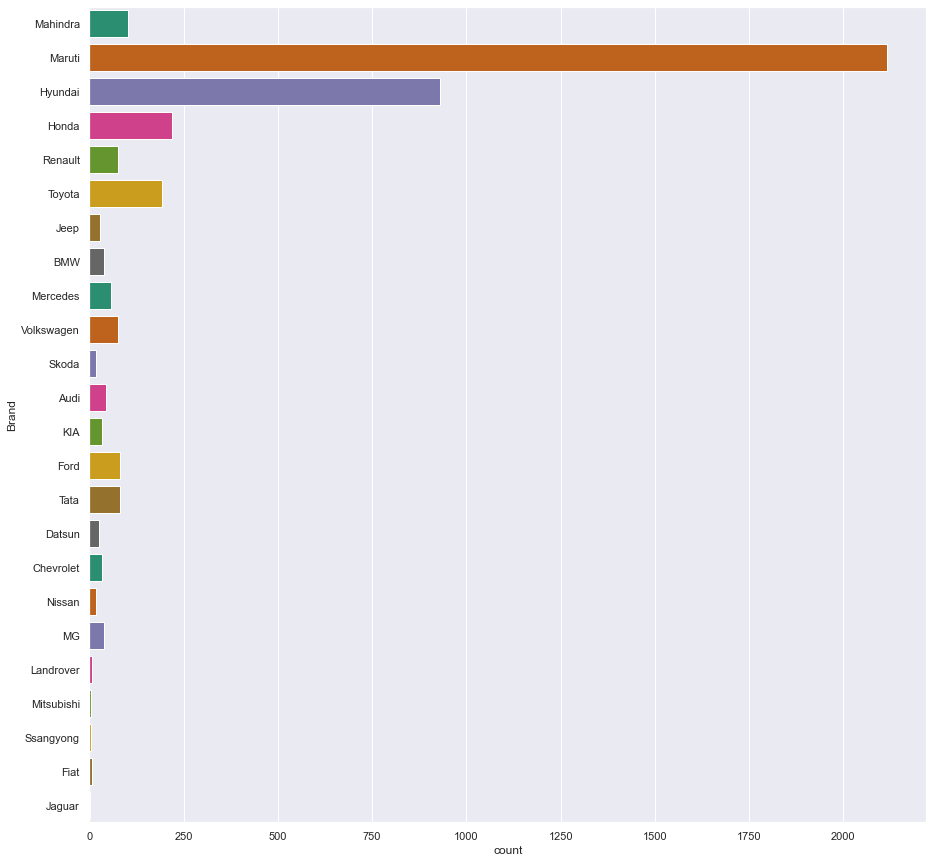

In [76]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(y = df["Brand"],palette="Dark2")

From the above plot, we can conclude that Maruti is the most trusted brand for buying cars in India. 

Petrol          2972
Diesel          1161
Petrol + CNG      79
Petrol + LPG      16
Name: Fuel, dtype: int64

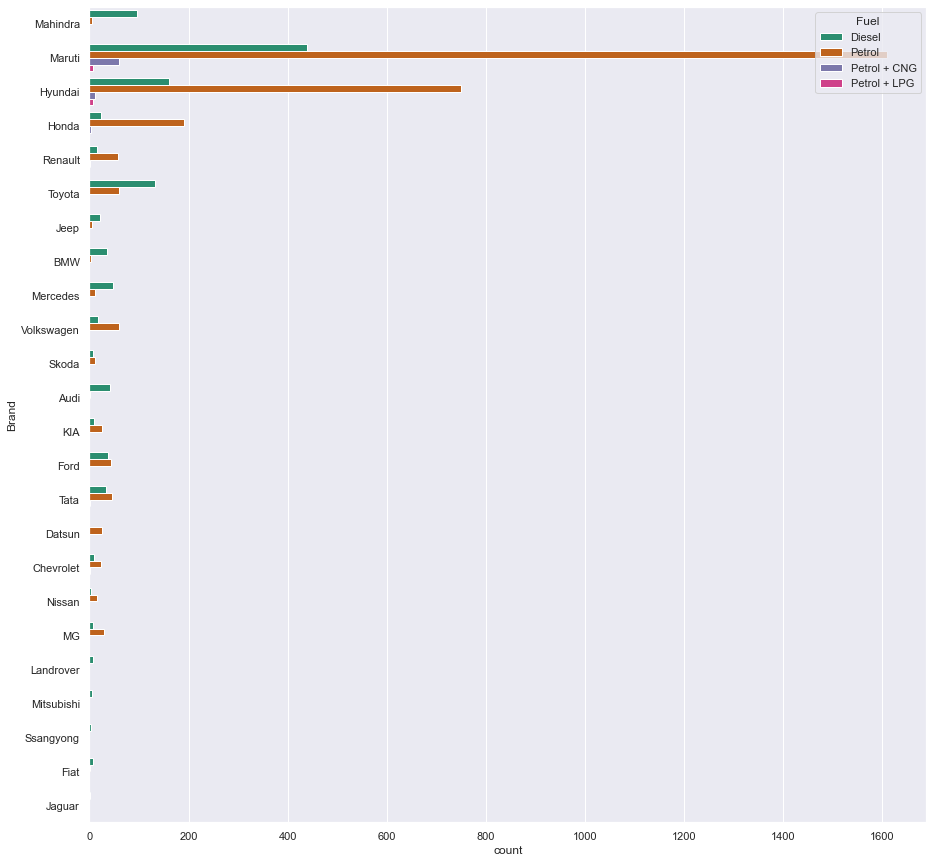

In [77]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(y = df["Brand"],hue=df["Fuel"],palette="Dark2")
df["Fuel"].value_counts()

Most of the used cars which are for sale have fuel type Petrol. There are some rare cars with fuel type Petrol + CNG or Petrol + LPG. Maybe customers in India mostly prefer to buy petrol variant cars.

Petrol          2972
Diesel          1161
Petrol + CNG      79
Petrol + LPG      16
Name: Fuel, dtype: int64

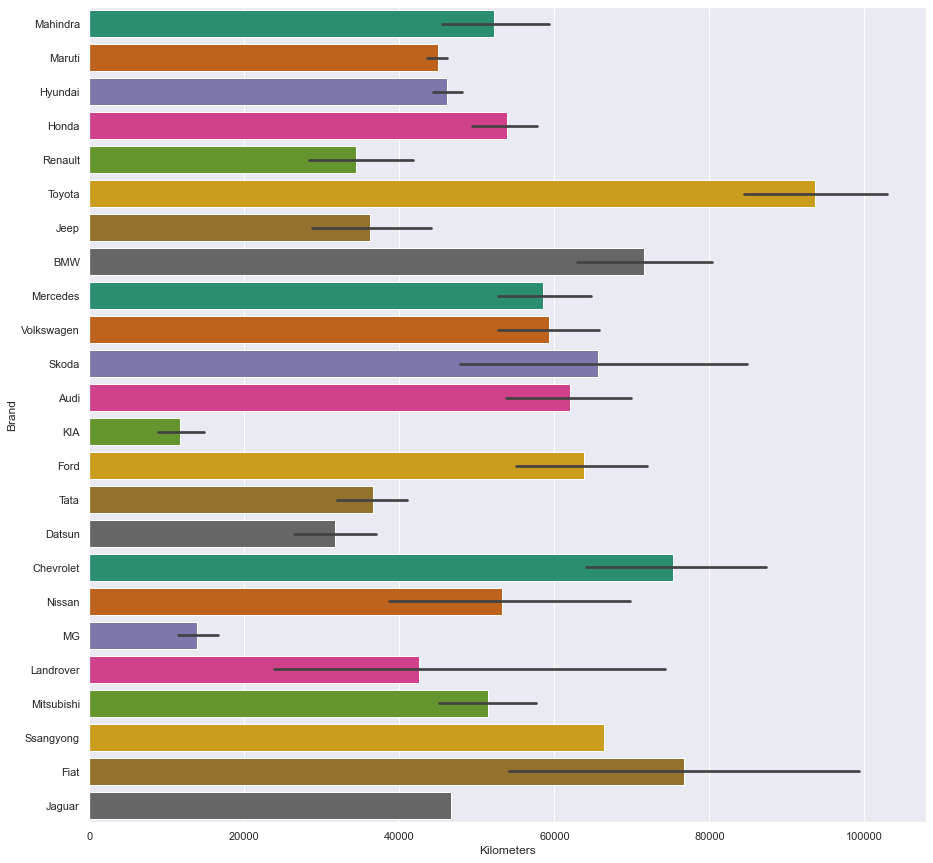

In [78]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's barplot
sns.barplot(y = df["Brand"],x=df["Kilometers"],palette="Dark2")
df["Fuel"].value_counts()

Car brands Toyata , chevrolet, BMW and Fiat have the highest running kilometers of approximately more that 70,000 kms. MG and Kia have the lowest running kilometers less than 20,000 kms

1.0    3214
2.0     898
3.0     107
4.0       7
5.0       2
Name: Owners, dtype: int64

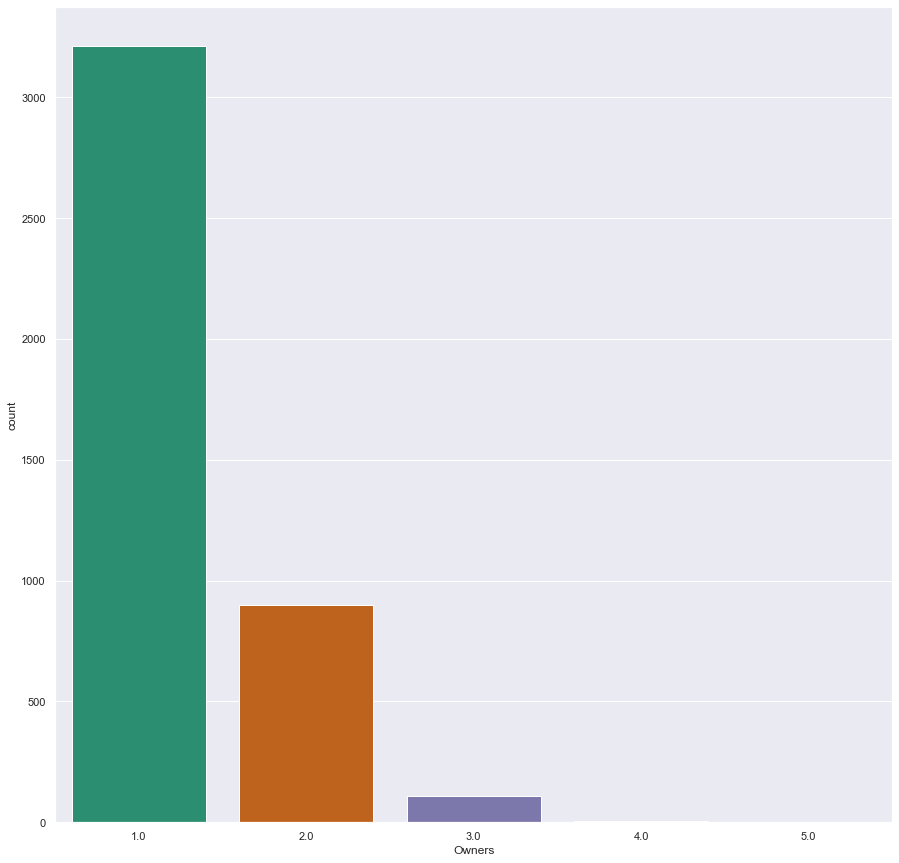

In [79]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(x=df["Owners"],palette="Dark2")
df["Owners"].value_counts()

Most of the used cars are single owner cars 

2017.0    975
2018.0    420
2016.0    391
2019.0    365
2015.0    358
2014.0    318
2012.0    278
2013.0    255
2011.0    218
2010.0    214
2009.0    157
2020.0    135
2008.0    115
2007.0     27
2021.0      2
Name: Purchase_Date, dtype: int64

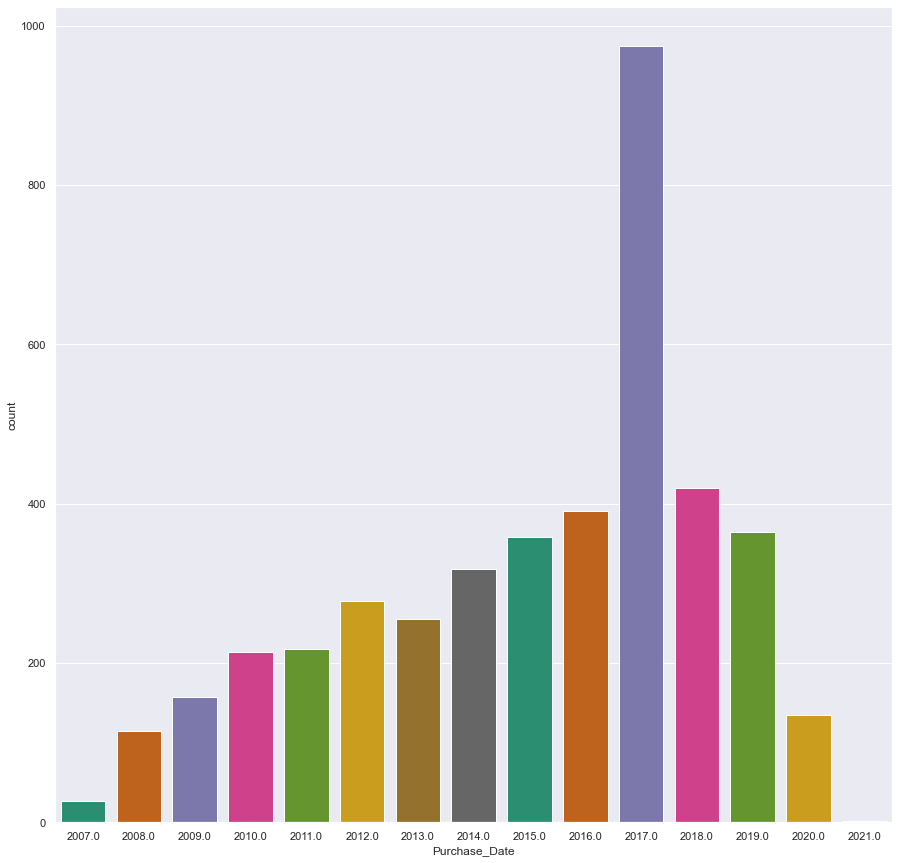

In [80]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(x=df["Purchase_Date"],palette="Dark2")
df["Purchase_Date"].value_counts()

Most of the cars were purchased in the year 2017

Petrol          2972
Diesel          1161
Petrol + CNG      79
Petrol + LPG      16
Name: Fuel, dtype: int64

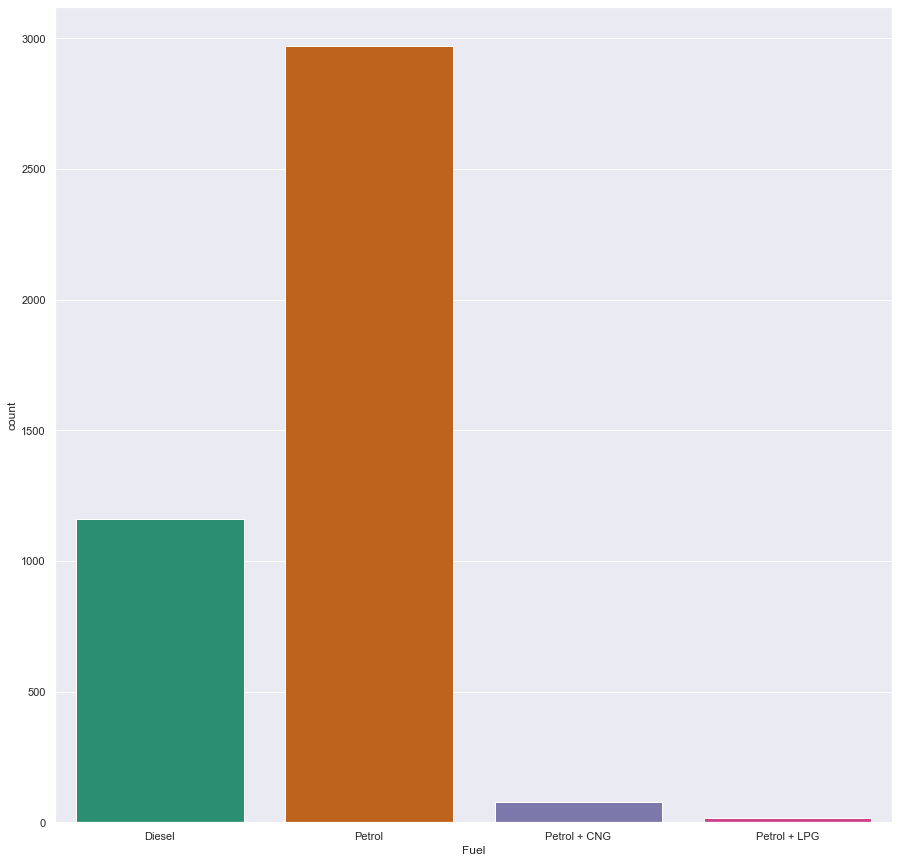

In [81]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(x=df["Fuel"],palette="Dark2")
df["Fuel"].value_counts()

Most of the used cars are petrol variant

<AxesSubplot:xlabel='Kilometers', ylabel='Fuel'>

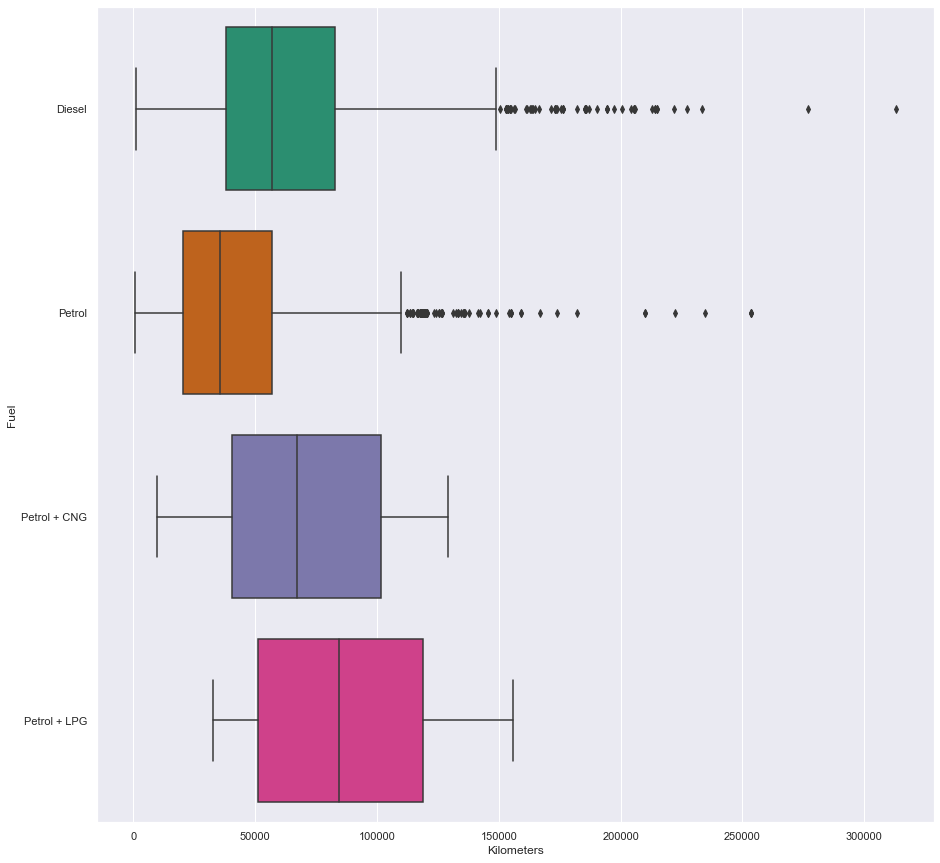

In [82]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's boxplot
sns.boxplot(y = df["Fuel"],x=df["Kilometers"],palette="Dark2")

Cars running on fuel type petrol have fewer running kilometers as compared to other fuel types.
Fuel type Petrol + LPG have the highest running kilometers more than 80,000 km

<AxesSubplot:xlabel='Location', ylabel='count'>

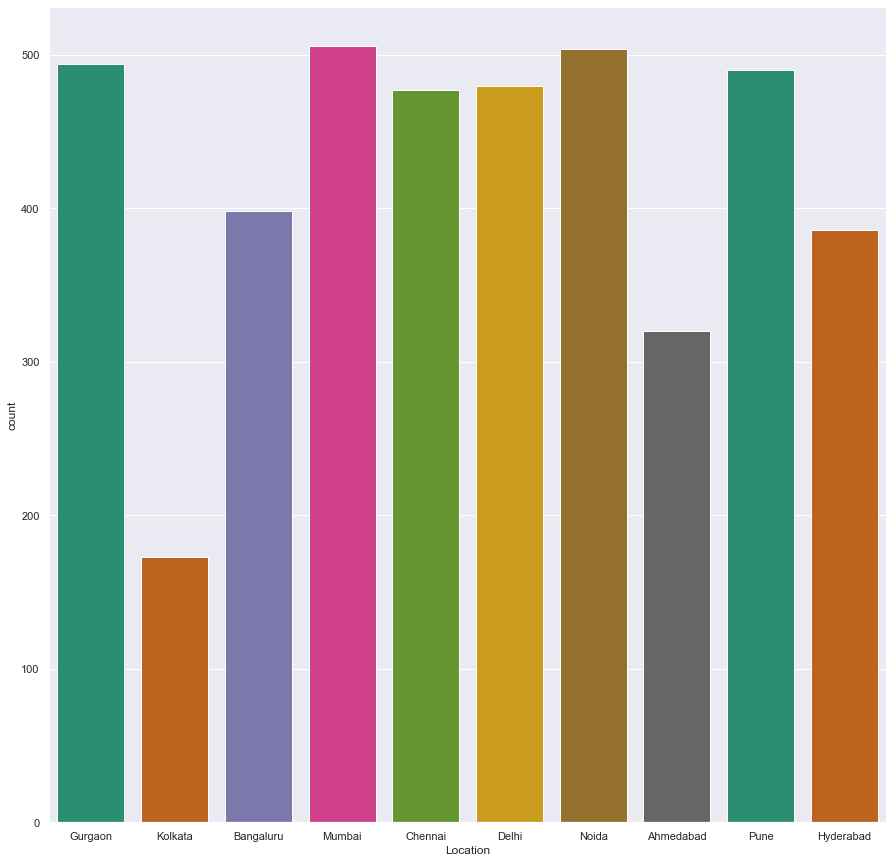

In [83]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(x=df["Location"],palette="Dark2")

Mumbai has the highest number of used cars recorded in this dataset. Kolkata has the lowest number of used cars

<AxesSubplot:xlabel='Transmission', ylabel='count'>

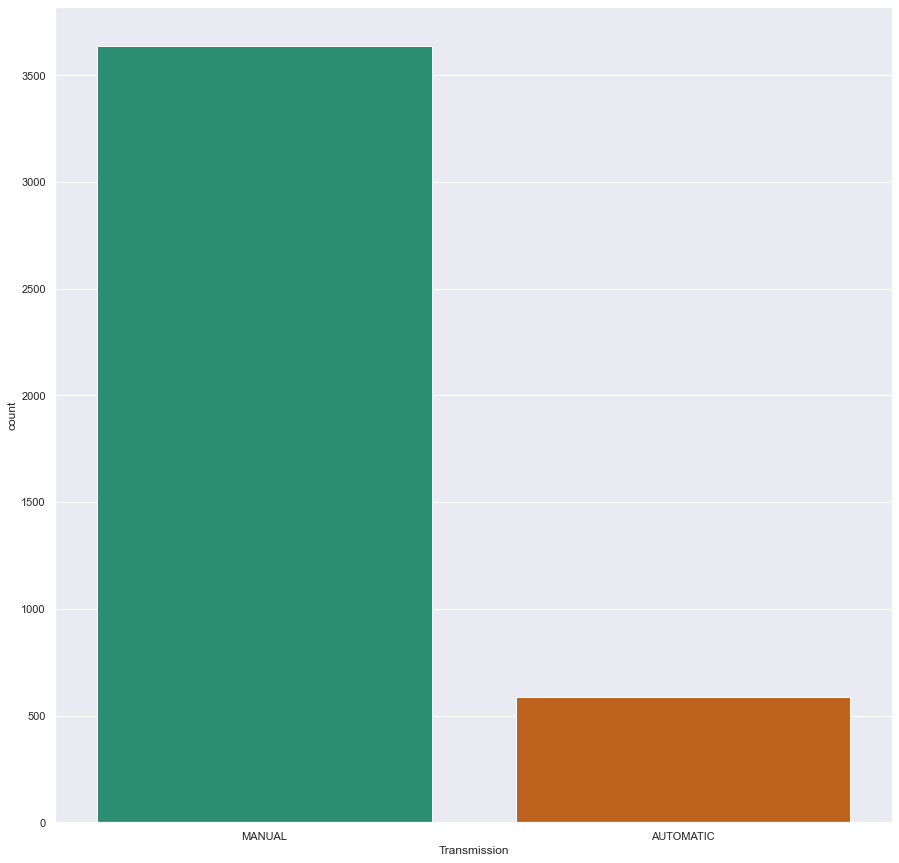

In [84]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(x=df["Transmission"],palette="Dark2")

Most of the customers prefer Manual transmission cars.

<AxesSubplot:xlabel='Price', ylabel='Brand'>

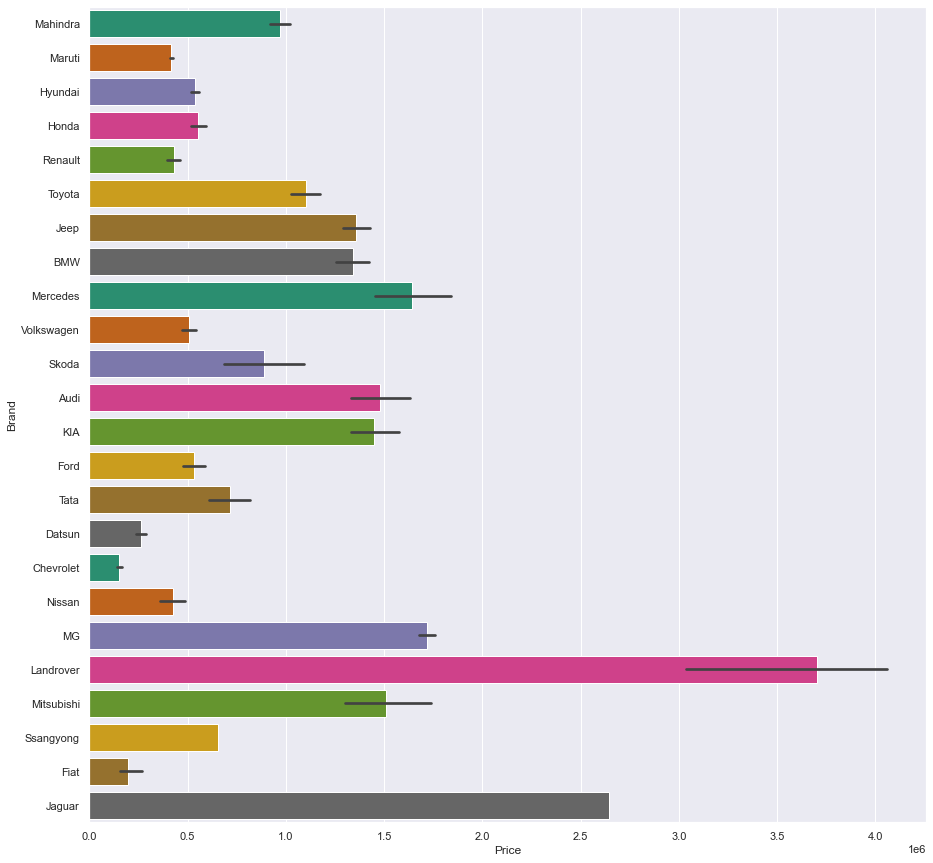

In [85]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's barplot
sns.barplot(y = df["Brand"],x=df["Price"],palette="Dark2")

We can clearly observe that Luxury brands like Landrover, Jaguar, and Mercedes are quite expensive. But there are also a lot of cars available for average customers.

<AxesSubplot:xlabel='count', ylabel='Brand'>

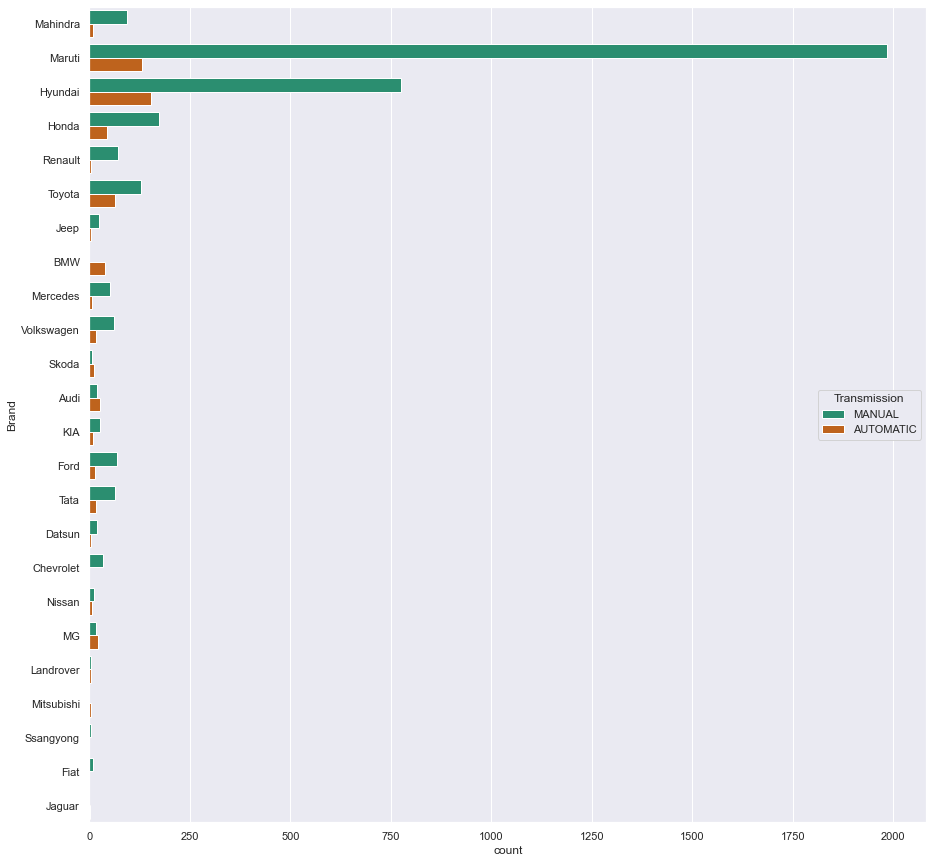

In [86]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(y=df["Brand"],hue=df["Transmission"],palette="Dark2")

Most of the customers prefer manual transmission cars, especially Maruti and Hyundai are trusted more than other brands for buying manual transmission used cars in India.

<AxesSubplot:xlabel='count', ylabel='Fuel'>

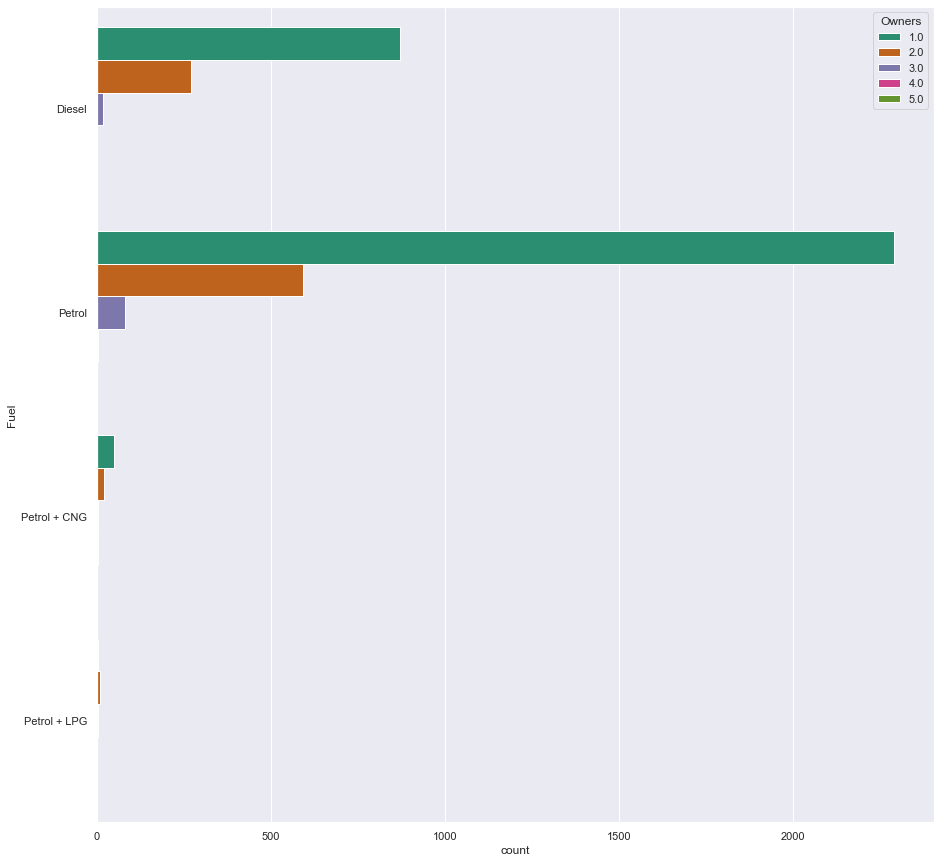

In [87]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(y=df["Fuel"],hue=df["Owners"],palette="Dark2")

Most of the cars with only one previous owner, are petrol variant cars.

<AxesSubplot:xlabel='count', ylabel='Fuel'>

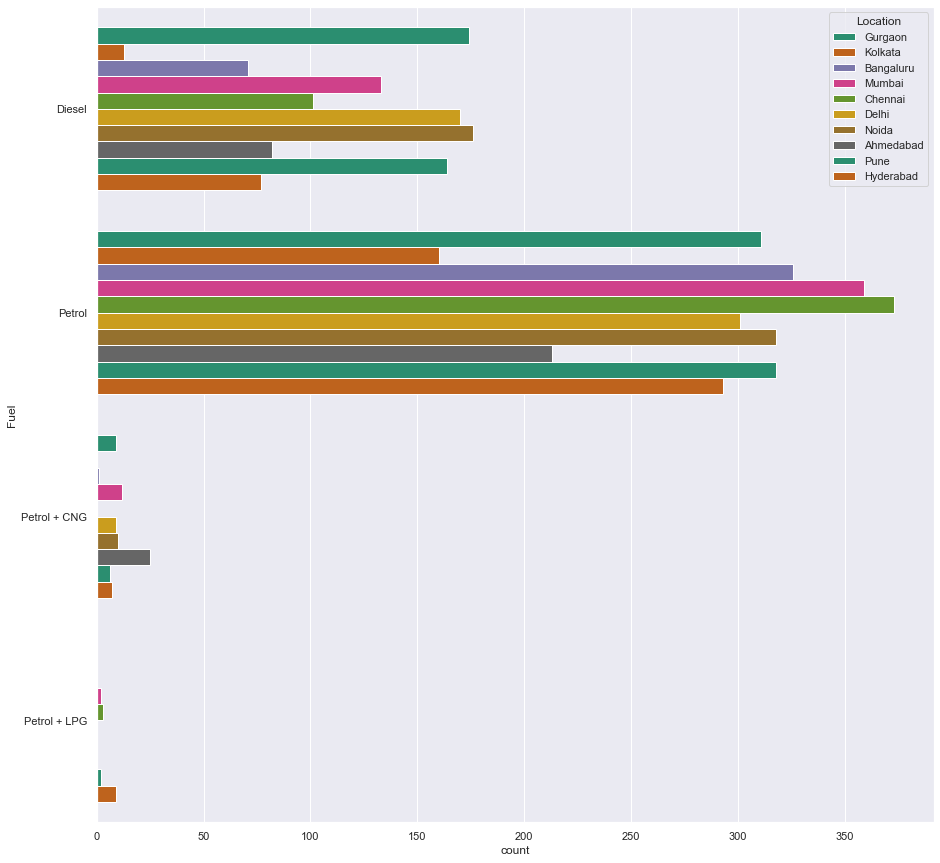

In [88]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's countplot
sns.countplot(y=df["Fuel"],hue=df["Location"],palette="Dark2")

Petrol and Diesel variant used cars are mostly available in all major cities in India.

<AxesSubplot:xlabel='Price', ylabel='Fuel'>

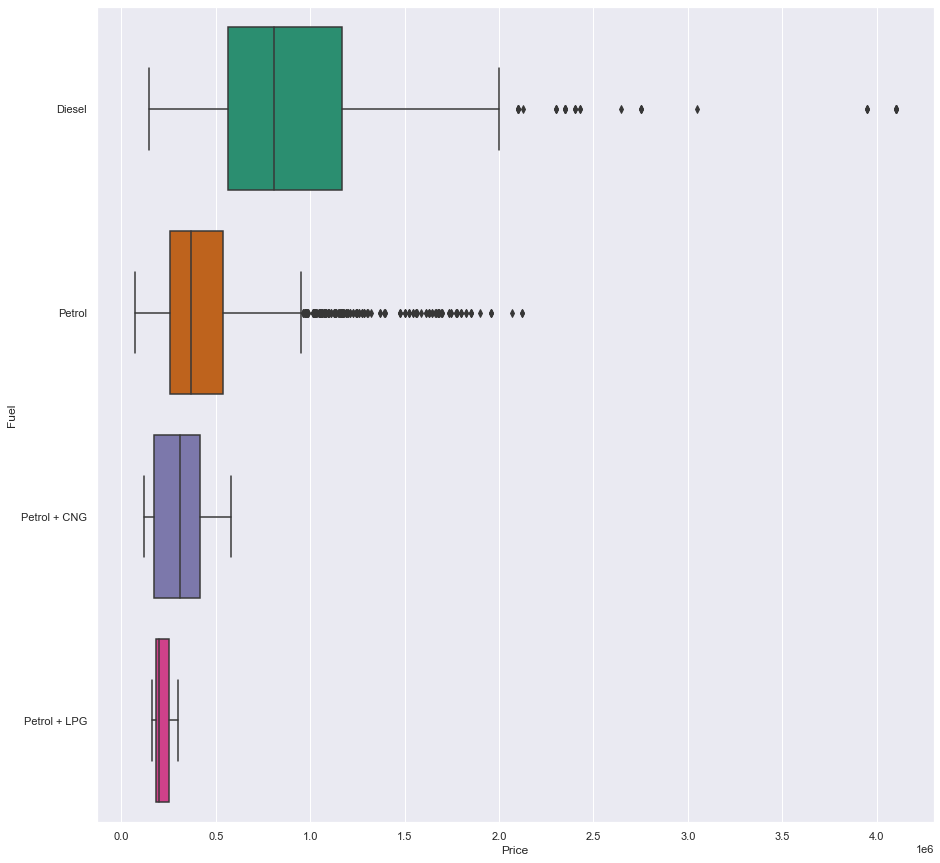

In [89]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's boxplot
sns.boxplot(y = df["Fuel"],x=df["Price"],palette="Dark2")

Diesel cars are more expensive than any other fuel type including petrol, LPG and CNG.

<AxesSubplot:xlabel='Price', ylabel='Kilometers'>

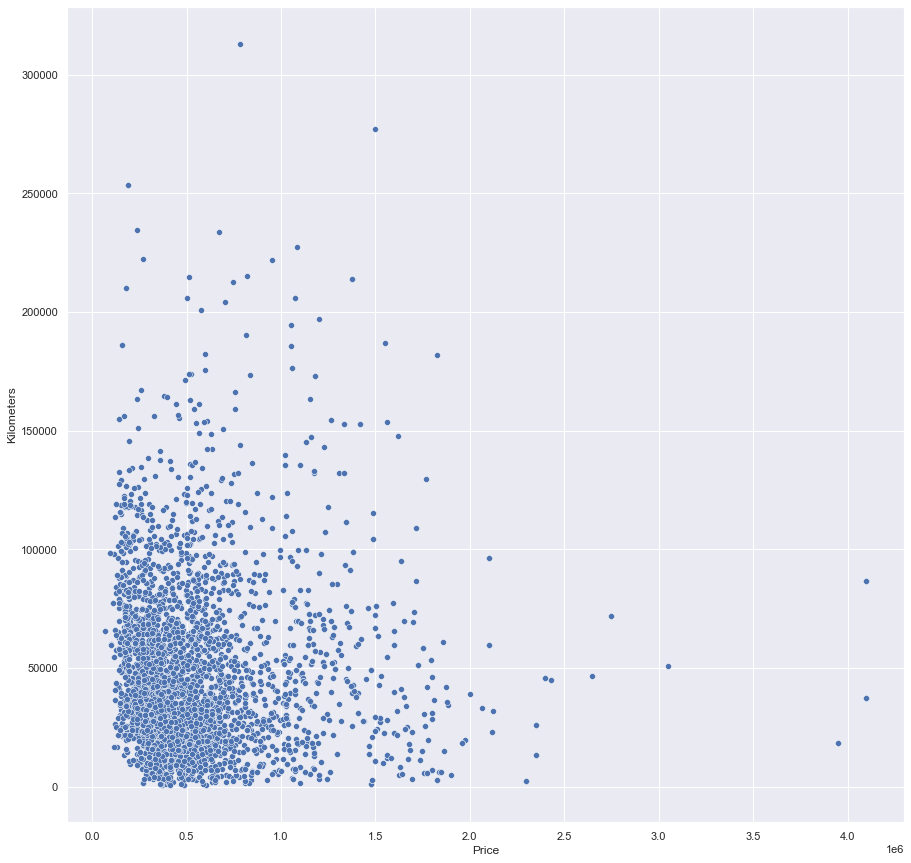

In [90]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's sctterplot
sns.scatterplot(y = df["Kilometers"],x=df["Price"],palette="Dark2")

From the above plot we can say that some of the used cars with less kilometers will be more expensive.

<AxesSubplot:xlabel='Kilometers', ylabel='Location'>

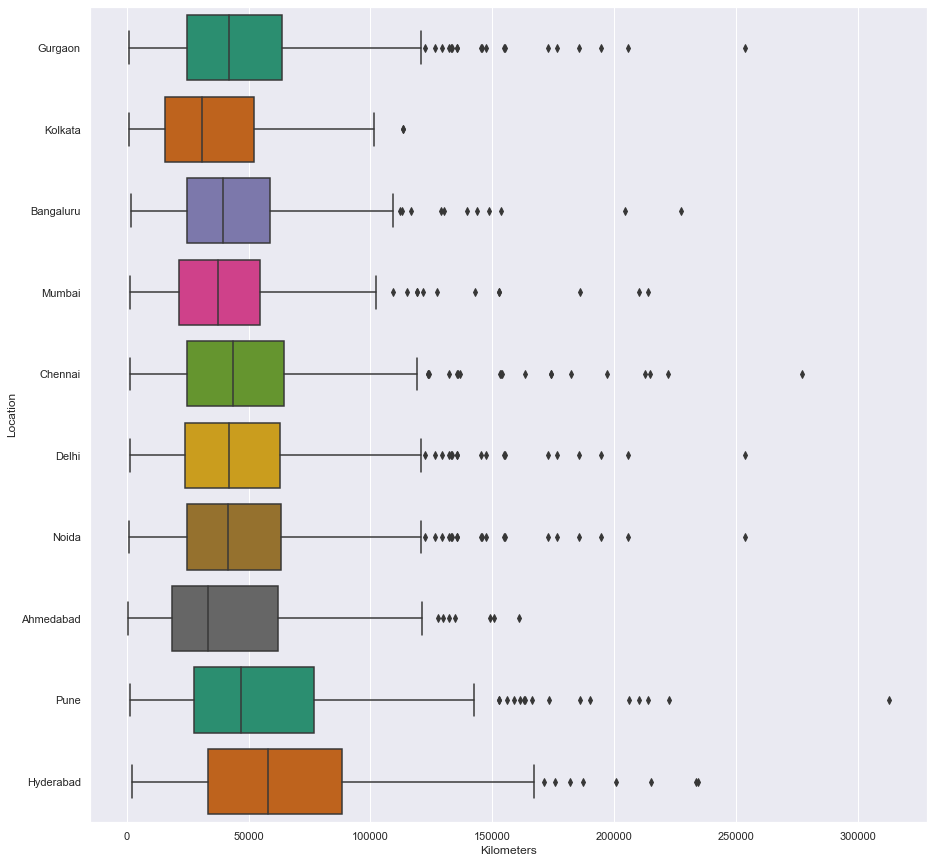

In [91]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's boxplot
sns.boxplot(y = df["Location"],x=df["Kilometers"],palette="Dark2")

Used cars from location Hyderabad have the highest running kilometers of more than 65,000 km

<AxesSubplot:xlabel='Kilometers', ylabel='Transmission'>

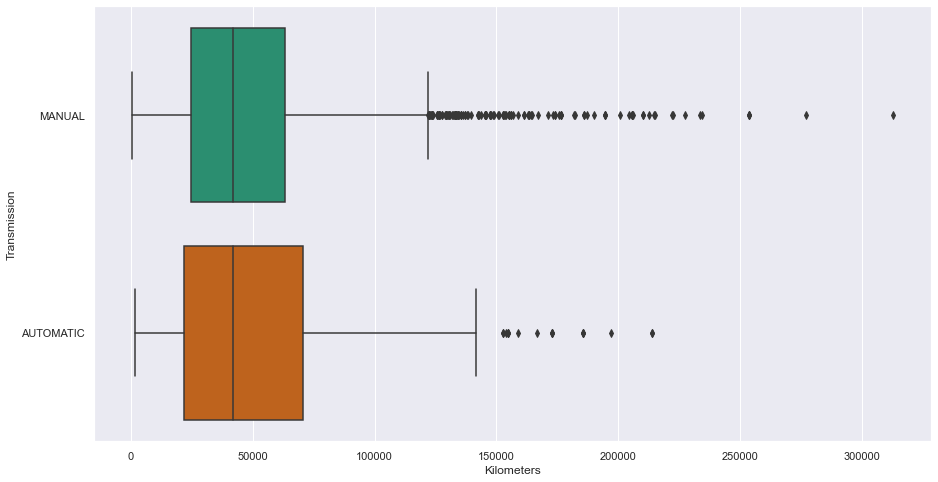

In [92]:
# Fig Size
plt.figure(figsize=(15,8))
# Using seaborn's boxplot
sns.boxplot(y = df["Transmission"],x=df["Kilometers"],palette="Dark2")

Used Cars with transmission type Automatic have higher running kilometers as compared to transmission type Manual

<AxesSubplot:xlabel='Purchase_Date', ylabel='Price'>

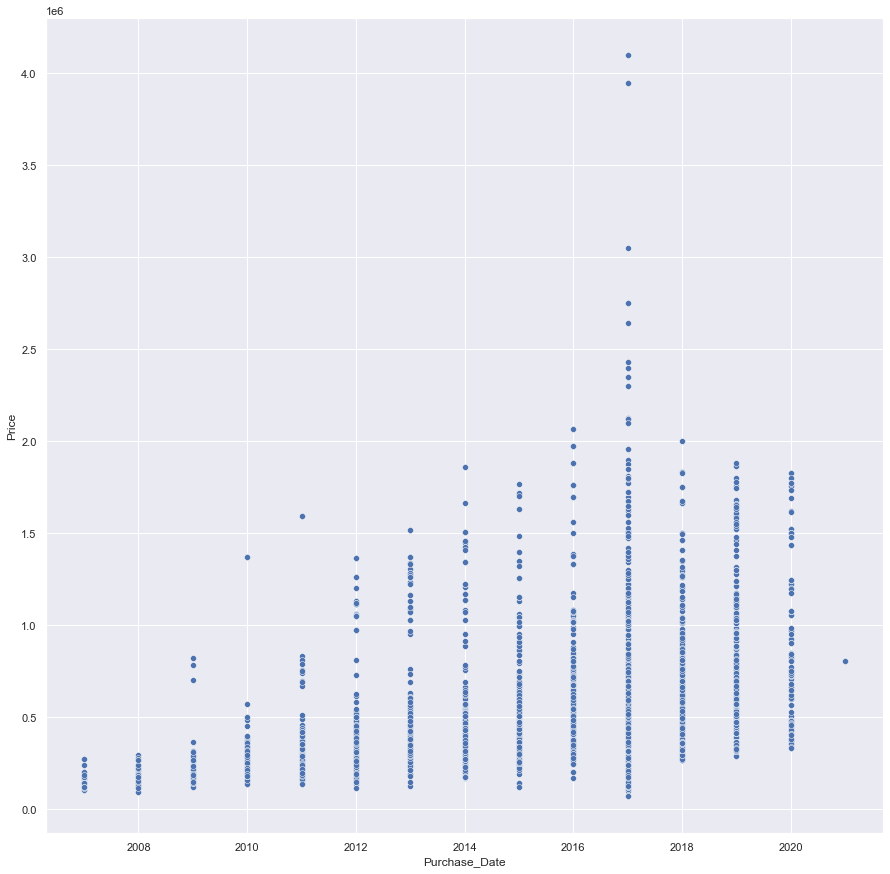

In [93]:
# Fig Size
plt.figure(figsize=(15,15))
# Using seaborn's sctterplot
sns.scatterplot(x=df["Purchase_Date"],y=df["Price"],palette="Dark2")

We can clearly observe that, the newer the used car is the more expensive it will be.

<AxesSubplot:xlabel='Kilometers', ylabel='Density'>

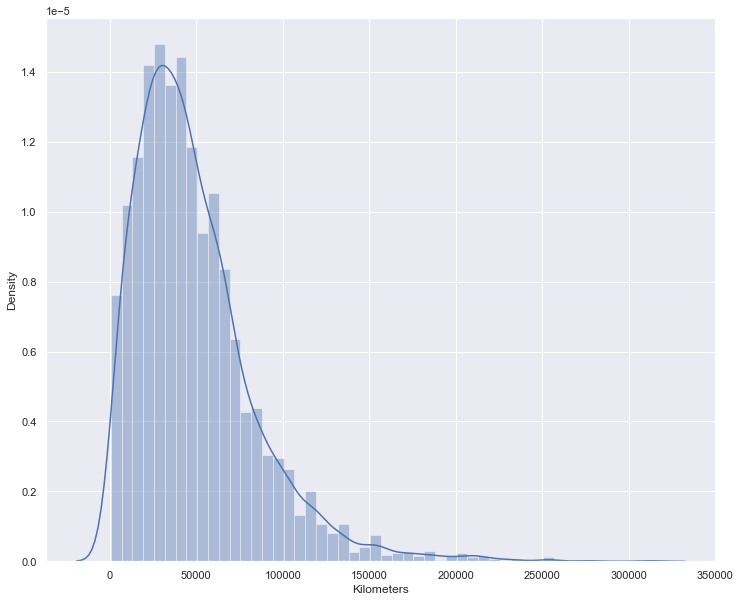

In [94]:
# Fig size
plt.figure(figsize=(12,10))
# Using seaborns distplot
sns.distplot(df["Kilometers"])

Average running kilometers per car is ~ 48,688. Lowest running km for a car is about 648 km

<AxesSubplot:xlabel='Price', ylabel='Density'>

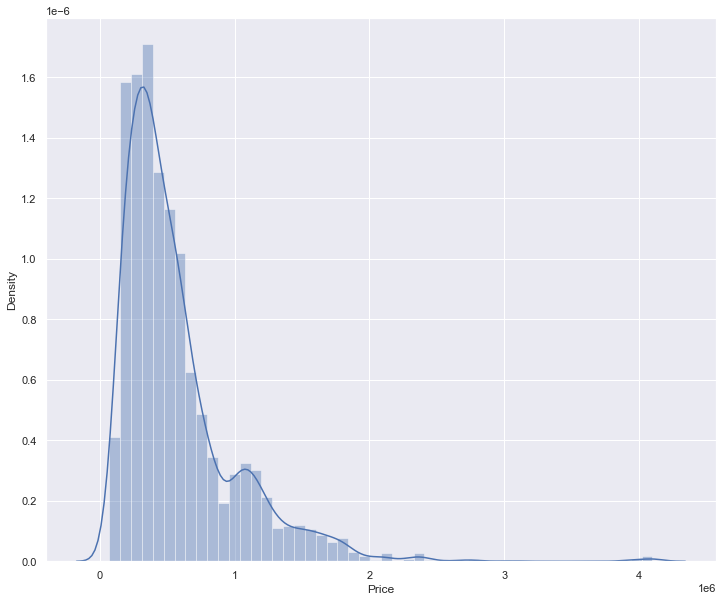

In [95]:
# Fig size
plt.figure(figsize=(12,10))
# Using seaborns distplot
sns.distplot(df["Price"])

Average price for used cars is about Rs ~ 5,72,921. The price variable looks normally distributed.   

### Data Preprocession

### Handling Outliers and transformation

In [96]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,51569.0,2016.0,1.0,Gurgaon,MANUAL,1018199.0
1,Alto,Maruti,LXI,Petrol,38732.0,2012.0,1.0,Kolkata,MANUAL,277999.0
2,i10,Hyundai,MAGNA,Petrol,38567.0,2010.0,1.0,Bangaluru,MANUAL,300799.0
3,WR-V,Honda,1.2,Petrol,17665.0,2018.0,1.0,Mumbai,MANUAL,757599.0
4,Eon,Hyundai,SPORTZ,Petrol,15346.0,2015.0,3.0,Chennai,MANUAL,333499.0


In [97]:
# Outlier detection for features which seems normally distributed

def normal(col):
    # Lower outlier
    low = df[col].mean() - 3*df[col].std()
    # Upper outlier
    up = df[col].mean() + 3*df[col].std()
    
    return (low,up)

In [98]:
# features with skewness 

def outSkew(col):
    # Calculating IQR 
    Iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    # Lower outlier
    low = df[col].quantile(0.25)-(Iqr*1.5)
    
    # upper outlier
    up = df[col].quantile(0.75)+(Iqr*1.5)
    
    return (low,up)

In [99]:
# features with very high skewness

def highSKew(col):
    
    # Calculating IQR
    Iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    # First Quartile
    low = df[col].quantile(0.25)-(Iqr*3)
    
    # third Quartile
    up = df[col].quantile(0.75)+(Iqr*3)
    
    return (low,up)

In [100]:
# function to create a boxplot

def boxplot(feature):
    
    plt.figure(figsize=(12,8))
    
    sns.boxplot(x=feature,data=df)

In [101]:
# function to create a histplot

def histplot(feature):
    
    plt.figure(figsize=(12,12))
    
    sns.histplot(x=feature,data=df,kde=True)

In [102]:
from scipy import stats

In [103]:
def QQ_plots(variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [104]:
# function for Log transformation

def logt(col):
    df[col] = np.log(df[col]+1)
    return df[col].skew()

In [105]:
# function for resiprocal transformation

def resiprocal(col):
    df[col]=1/(df[col]+1)
    return df[col].skew()

In [106]:
# Square root transformation
def sRoot(col):
    
    df[col]=df[col]**(1/2)
    
    return df[col].skew()

In [107]:
# function for exponential transformation

def exponential(col):
    
    df[col]=df[col]**(1/5)
    
    df[col].skew()

In [108]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,51569.0,2016.0,1.0,Gurgaon,MANUAL,1018199.0
1,Alto,Maruti,LXI,Petrol,38732.0,2012.0,1.0,Kolkata,MANUAL,277999.0
2,i10,Hyundai,MAGNA,Petrol,38567.0,2010.0,1.0,Bangaluru,MANUAL,300799.0
3,WR-V,Honda,1.2,Petrol,17665.0,2018.0,1.0,Mumbai,MANUAL,757599.0
4,Eon,Hyundai,SPORTZ,Petrol,15346.0,2015.0,3.0,Chennai,MANUAL,333499.0


#### Kilometers

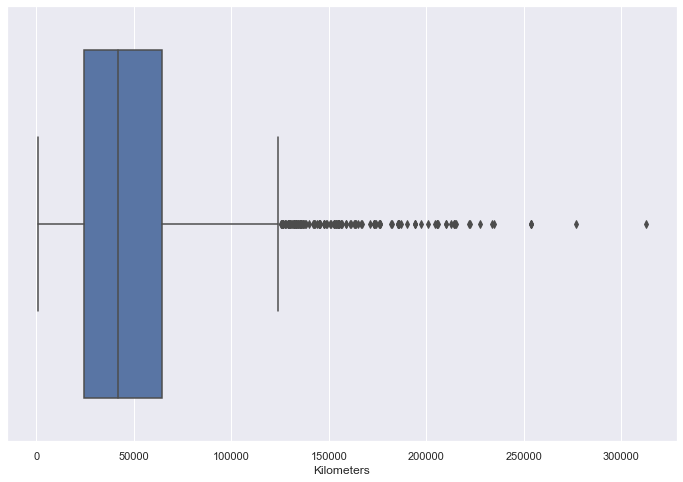

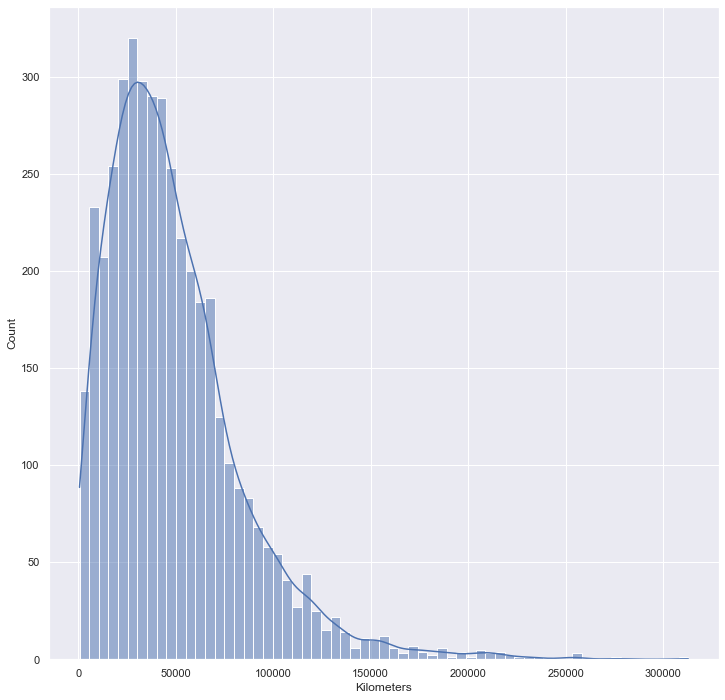

In [109]:
# boxplot for LotFrontage
boxplot("Kilometers")

print("\n")

# histplot for LotFrontage
histplot("Kilometers")

In [110]:
# Kilometers looks like a right skewed distribution

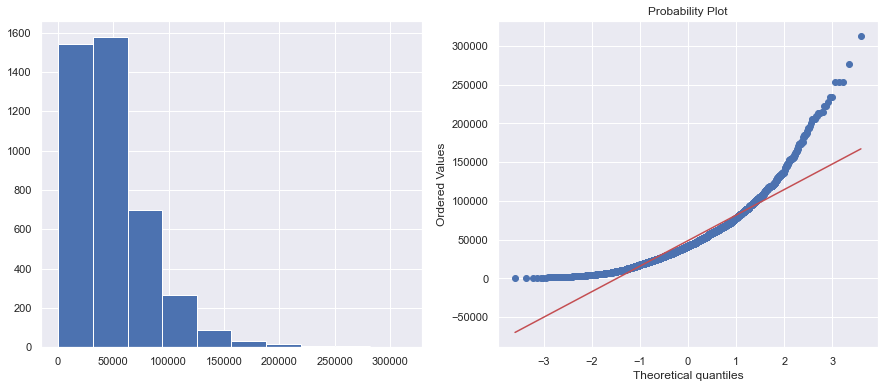

In [111]:
## Checking QQ plot
QQ_plots("Kilometers")

In [112]:
outSkew("Kilometers")

(-36053.875, 124617.125)

In [113]:
# Anything above 124617.12 is considered as an outlier

df.loc[df["Kilometers"] >= 124617.12,"Kilometers"] = 124617.12

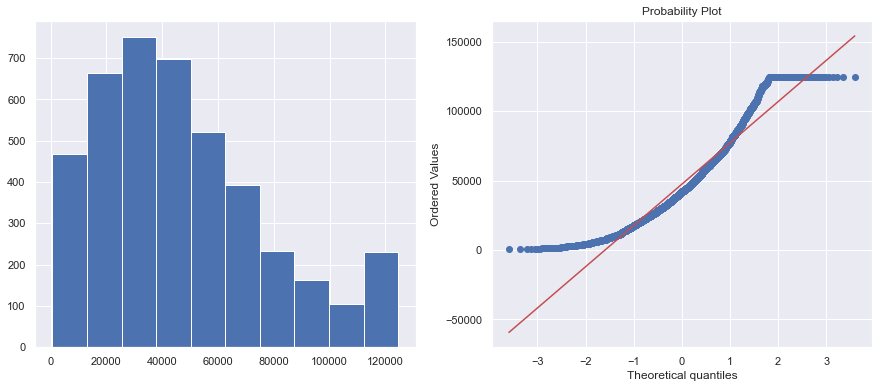

In [114]:
## Checking QQ plot
QQ_plots("Kilometers")

In [115]:
# Checking Skewness
df["Kilometers"].skew()

0.8101712014304718

In [116]:
# Applying Square root transformation
sRoot("Kilometers")

0.0575185935035886

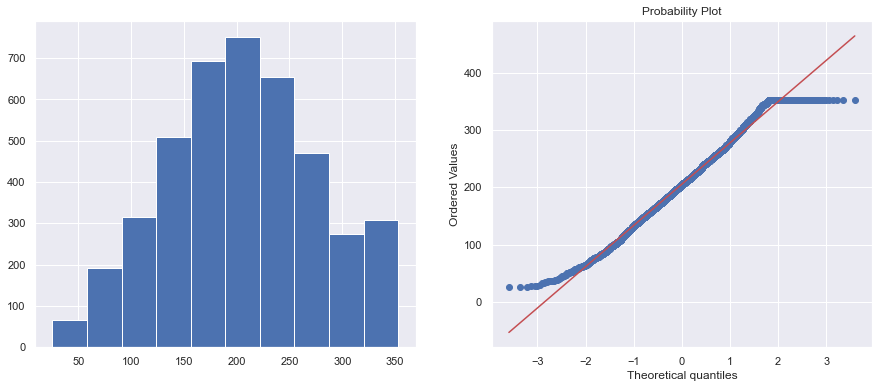

In [117]:
## Checking QQ plot
QQ_plots("Kilometers")

### Encoding Data

In [118]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,Scorpio,Mahindra,S10,Diesel,227.088089,2016.0,1.0,Gurgaon,MANUAL,1018199.0
1,Alto,Maruti,LXI,Petrol,196.804471,2012.0,1.0,Kolkata,MANUAL,277999.0
2,i10,Hyundai,MAGNA,Petrol,196.384826,2010.0,1.0,Bangaluru,MANUAL,300799.0
3,WR-V,Honda,1.2,Petrol,132.909744,2018.0,1.0,Mumbai,MANUAL,757599.0
4,Eon,Hyundai,SPORTZ,Petrol,123.878973,2015.0,3.0,Chennai,MANUAL,333499.0


In [119]:
correlation_df = df

In [120]:
# Applying Target encoding on Car_Name and Variant Column

from category_encoders import TargetEncoder

In [121]:
encoder = TargetEncoder()

In [122]:
df[["Car_Name","Variant"]] = encoder.fit_transform(df[["Car_Name","Variant"]], df["Price"])

In [123]:
df.head()

,Car_Name,Brand,Variant,Fuel,Kilometers,Purchase_Date,Owners,Location,Transmission,Price
0,1.056049e+06,Mahindra,1.004440e+06,Diesel,227.088089,2016.0,1.0,Gurgaon,MANUAL,1018199.0
1,2.564443e+05,Maruti,2.472091e+05,Petrol,196.804471,2012.0,1.0,Kolkata,MANUAL,277999.0
2,2.741953e+05,Hyundai,3.163758e+05,Petrol,196.384826,2010.0,1.0,Bangaluru,MANUAL,300799.0
3,7.501658e+05,Honda,4.936754e+05,Petrol,132.909744,2018.0,1.0,Mumbai,MANUAL,757599.0
4,2.653479e+05,Hyundai,4.191092e+05,Petrol,123.878973,2015.0,3.0,Chennai,MANUAL,333499.0


In [124]:
# Using Pandas .get_dummies on rest of the columns

df = pd.get_dummies(data=df,drop_first=True)

In [125]:
df.head()

,Car_Name,Variant,Kilometers,Purchase_Date,Owners,Price,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_KIA,Brand_Landrover,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Mitsubishi,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Ssangyong,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Location_Bangaluru,Location_Chennai,Location_Delhi,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Pune,Transmission_MANUAL
0,1.056049e+06,1.004440e+06,227.088089,2016.0,1.0,1018199.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2.564443e+05,2.472091e+05,196.804471,2012.0,1.0,277999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,2.741953e+05,3.163758e+05,196.384826,2010.0,1.0,300799.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,7.501658e+05,4.936754e+05,132.909744,2018.0,1.0,757599.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2.653479e+05,4.191092e+05,123.878973,2015.0,3.0,333499.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [126]:
df.shape

(4228, 42)

### Train Test Split 

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
# Seprating independent and dependent feature from train dataset
x = df.drop("Price",axis=1)
y = df["Price"]

In [129]:
x.head()

,Car_Name,Variant,Kilometers,Purchase_Date,Owners,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_KIA,Brand_Landrover,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Mitsubishi,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Ssangyong,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Location_Bangaluru,Location_Chennai,Location_Delhi,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Pune,Transmission_MANUAL
0,1.056049e+06,1.004440e+06,227.088089,2016.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2.564443e+05,2.472091e+05,196.804471,2012.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,2.741953e+05,3.163758e+05,196.384826,2010.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,7.501658e+05,4.936754e+05,132.909744,2018.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2.653479e+05,4.191092e+05,123.878973,2015.0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [130]:
y.head()

0    1018199.0
1     277999.0
2     300799.0
3     757599.0
4     333499.0
Name: Price, dtype: float64

### Scaling

In [131]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler

In [132]:
sc = StandardScaler()

In [133]:
# using fit transform of test data
scale_x = sc.fit_transform(x)

In [134]:
x = pd.DataFrame(scale_x,columns=x.columns)

In [135]:
x.head()

,Car_Name,Variant,Kilometers,Purchase_Date,Owners,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_KIA,Brand_Landrover,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Mitsubishi,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Ssangyong,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Location_Bangaluru,Location_Chennai,Location_Delhi,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Pune,Transmission_MANUAL
0,1.248814,1.144302,0.300461,0.299994,-0.525962,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,-0.233161,-0.531026,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,6.360109,-1.000473,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,-1.538259,-0.137988,-0.061633,-0.322361,-0.356604,-0.357866,2.749310,-0.316968,-0.206551,-0.368712,-0.367884,-0.362058,0.402315
1,-0.814517,-0.851780,-0.118743,-0.953652,-0.525962,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,-0.233161,-0.531026,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,-0.157230,0.999527,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,0.650085,-0.137988,-0.061633,-0.322361,-0.356604,-0.357866,-0.363728,-0.316968,4.841416,-0.368712,-0.367884,-0.362058,0.402315
2,-0.768711,-0.669455,-0.124552,-1.580475,-0.525962,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,-0.233161,1.883145,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,-0.157230,-1.000473,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,0.650085,-0.137988,-0.061633,3.102115,-0.356604,-0.357866,-0.363728,-0.316968,-0.206551,-0.368712,-0.367884,-0.362058,0.402315
3,0.459501,-0.202088,-1.003213,0.926817,-0.525962,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,4.288880,-0.531026,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,-0.157230,-1.000473,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,0.650085,-0.137988,-0.061633,-0.322361,-0.356604,-0.357866,-0.363728,-0.316968,-0.206551,2.712145,-0.367884,-0.362058,0.402315
4,-0.791542,-0.398647,-1.128222,-0.013417,3.371968,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,-0.233161,1.883145,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,-0.157230,-1.000473,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,0.650085,-0.137988,-0.061633,-0.322361,2.804235,-0.357866,-0.363728,-0.316968,-0.206551,-0.368712,-0.367884,-0.362058,0.402315


In [136]:
y.head()

0    1018199.0
1     277999.0
2     300799.0
3     757599.0
4     333499.0
Name: Price, dtype: float64

### Feature Selection

In [137]:
df.head()

,Car_Name,Variant,Kilometers,Purchase_Date,Owners,Price,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_KIA,Brand_Landrover,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Mitsubishi,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Ssangyong,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Location_Bangaluru,Location_Chennai,Location_Delhi,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Pune,Transmission_MANUAL
0,1.056049e+06,1.004440e+06,227.088089,2016.0,1.0,1018199.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2.564443e+05,2.472091e+05,196.804471,2012.0,1.0,277999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,2.741953e+05,3.163758e+05,196.384826,2010.0,1.0,300799.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,7.501658e+05,4.936754e+05,132.909744,2018.0,1.0,757599.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2.653479e+05,4.191092e+05,123.878973,2015.0,3.0,333499.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [138]:
df.shape

(4228, 42)

In [139]:
cor = df.corr()

<AxesSubplot:>

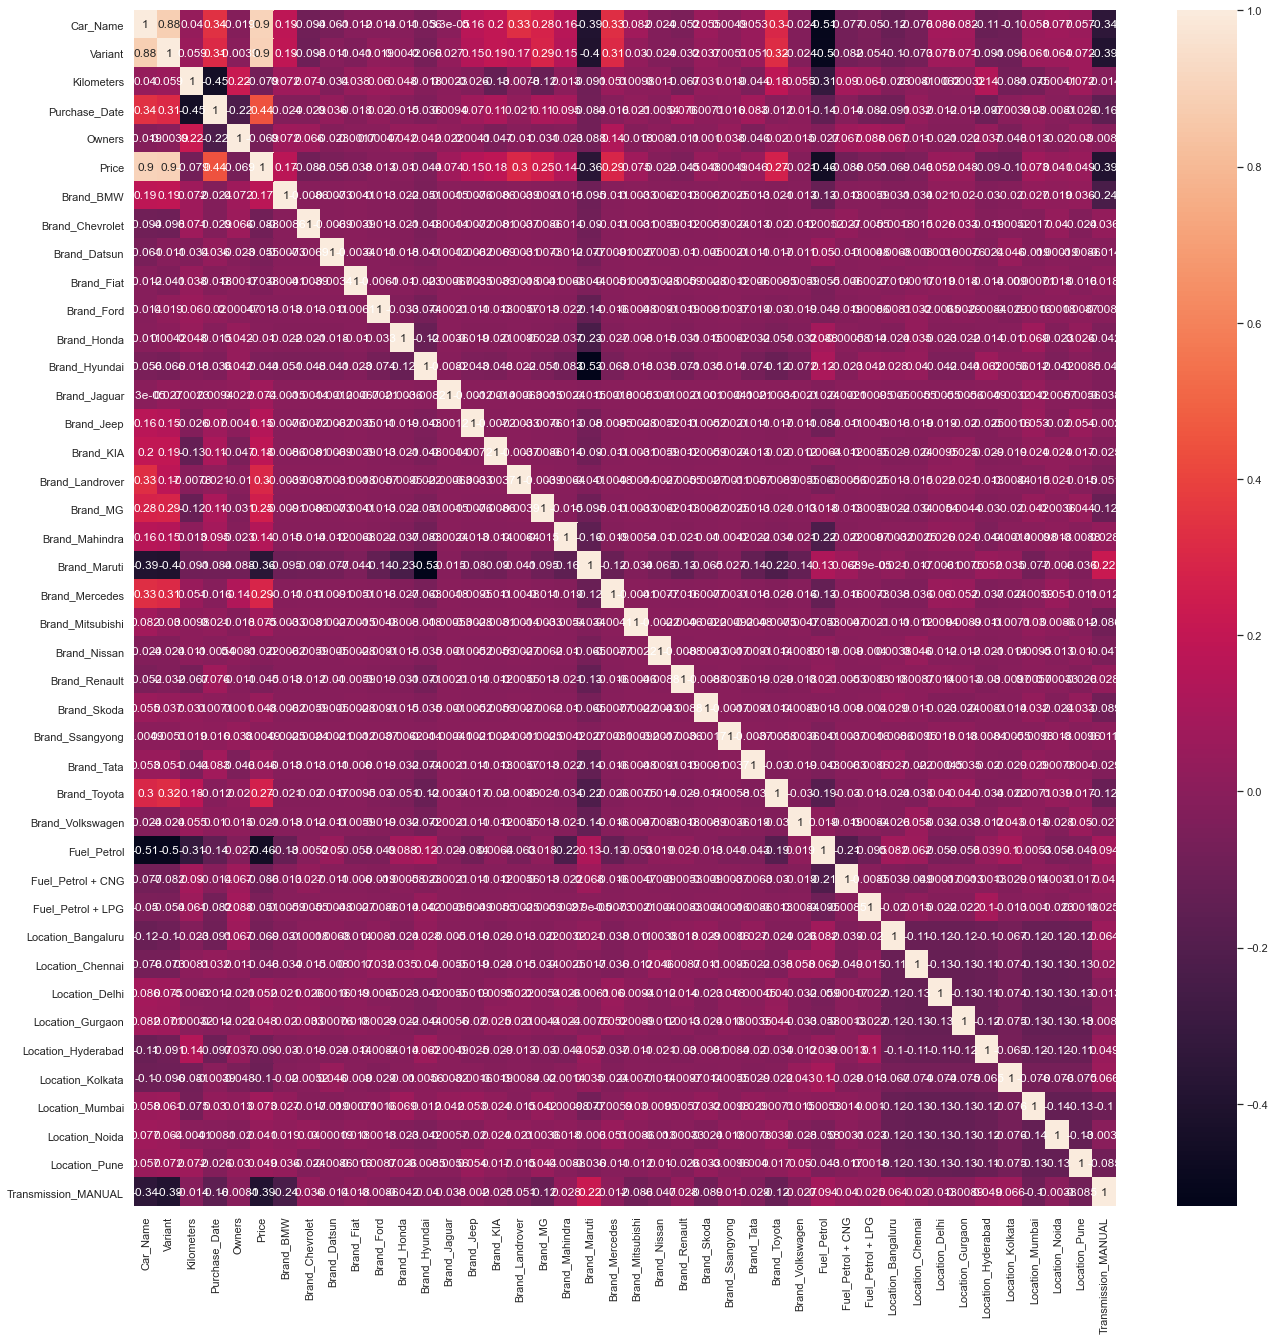

In [140]:
#correlation for continuous features.
plt.figure(figsize=(22,22))

sns.heatmap(cor,annot=True)

In [141]:
# We can clearly see the features which are highly correlated with the target variable
cor["Price"].sort_values(ascending=False)

Price                  1.000000
Car_Name               0.901571
Variant                0.897978
Purchase_Date          0.444294
Brand_Landrover        0.295441
Brand_Mercedes         0.292204
Brand_Toyota           0.266526
Brand_MG               0.252413
Brand_KIA              0.182262
Brand_BMW              0.169953
Brand_Jeep             0.145988
Brand_Mahindra         0.143930
Brand_Mitsubishi       0.074754
Brand_Jaguar           0.073888
Location_Mumbai        0.073184
Location_Delhi         0.052038
Location_Pune          0.049432
Location_Gurgaon       0.048425
Brand_Skoda            0.047665
Brand_Tata             0.046278
Location_Noida         0.041127
Brand_Ssangyong        0.004924
Brand_Honda           -0.009955
Brand_Ford            -0.013141
Brand_Volkswagen      -0.021254
Brand_Nissan          -0.022110
Brand_Fiat            -0.038205
Brand_Hyundai         -0.044219
Brand_Renault         -0.045115
Location_Chennai      -0.045932
Fuel_Petrol + LPG     -0.050895
Brand_Da

In [142]:
# with the following function we can select highly correlated features

# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    # Set of all the names of correlated columns
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                # getting the name of column
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [143]:
# creating a variable to store the function results 

corr_feat = correlation(df,0.8)

In [144]:
corr_feat

{'Price', 'Variant'}

In [145]:
# We don't have to worry about multicollinearity as Price is the target variable

### Train Test Split

In [146]:
X = x.values
y = y.values

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [148]:
X_train.shape

(3382, 41)

In [149]:
X_test.shape

(846, 41)

In [150]:
y_train.shape

(3382,)

In [151]:
y_test.shape

(846,)

## Machine Learning

#### Linear Regression

In [152]:
# r2 score metrix for regression
from sklearn.metrics import r2_score

In [153]:
# crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [154]:
# sklearn's linear regression 
from sklearn.linear_model import LinearRegression

In [155]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    mod_1 = LinearRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = r2_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.9047603038495761
for random state  0  The testing accuracy is : 0.884384769338564


for random state  1  The training accuracy is : 0.9035691878708239
for random state  1  The testing accuracy is : 0.9011228795806451


for random state  2  The training accuracy is : 0.9050755280094079
for random state  2  The testing accuracy is : 0.8915978681639667


for random state  3  The training accuracy is : 0.903868095836042
for random state  3  The testing accuracy is : 0.9014886541056136


for random state  4  The training accuracy is : 0.9057774555720025
for random state  4  The testing accuracy is : 0.8921647998255672


for random state  5  The training accuracy is : 0.89848349617273
for random state  5  The testing accuracy is : 0.9100004811522482


for random state  6  The training accuracy is : 0.9071210046380203
for random state  6  The testing accuracy is : 0.8882574347297277


for random state  7  The training accuracy is : 0.899992908

for random state  72  The training accuracy is : 0.9078176487956641
for random state  72  The testing accuracy is : 0.8830686352010602


for random state  73  The training accuracy is : 0.906191501970858
for random state  73  The testing accuracy is : 0.8560889498751647


for random state  74  The training accuracy is : 0.9059305110604088
for random state  74  The testing accuracy is : 0.8900918533274622


for random state  75  The training accuracy is : 0.904505970837008
for random state  75  The testing accuracy is : 0.8956126089523022


for random state  76  The training accuracy is : 0.9053016456849098
for random state  76  The testing accuracy is : 0.8764707049933299


for random state  77  The training accuracy is : 0.9046359564737828
for random state  77  The testing accuracy is : 0.8982912111128414


for random state  78  The training accuracy is : 0.9084587699664547
for random state  78  The testing accuracy is : 0.88195307089031


for random state  79  The training accuracy i

In [156]:
# Taking best random state as 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
mod_1 = LinearRegression() 
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = r2_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)
print("\n")

The training accuracy is : 0.9041909178791092
The testing accuracy is : 0.9014225442405491




In [157]:
# regression metrix MSE
from sklearn.metrics import mean_squared_error,mean_absolute_error

#### Mean Square Error

In [158]:
MSE_1 = mean_squared_error(y_test,pred_1)
print(MSE_1)

17055775504.836805


#### Mean Absolute Error

In [159]:
MAE_1 = mean_absolute_error(y_test,pred_1)
print(MAE_1)

82313.79067927359


#### Root Mean Square Error

In [160]:
RMSE_1 = np.sqrt(mean_squared_error(y_test,pred_1))
print(RMSE_1)

130597.76225049495


## Kfold Cross validation 

In [161]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [162]:
kfold_accuracy_LR

0.8958930929732294

In [163]:
score = {"Algorithm":["Linear Regression"],
         "Training_Acc":[train_score_1],
        "R2 Score":[test_score_1],
         "MSE":[MSE_1],
         "MAE":[MAE_1],
         "RMSE":[RMSE_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [164]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.904191,0.901423,1.705578e+10,82313.790679,130597.76225,0.895893


### Random Forest Regression

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    mod_2 = RandomForestRegressor() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = r2_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.9945381777676264
for random state  0  The testing accuracy is : 0.9440384529812212


for random state  1  The training accuracy is : 0.9924703769893111
for random state  1  The testing accuracy is : 0.9611537565006235


for random state  2  The training accuracy is : 0.9916780630300819
for random state  2  The testing accuracy is : 0.9539684029868203


for random state  3  The training accuracy is : 0.9917318511862481
for random state  3  The testing accuracy is : 0.9601249225068134


for random state  4  The training accuracy is : 0.9923440203457525
for random state  4  The testing accuracy is : 0.9598208166781222


for random state  5  The training accuracy is : 0.993191525558873
for random state  5  The testing accuracy is : 0.9616137427708866


for random state  6  The training accuracy is : 0.9925269181158731
for random state  6  The testing accuracy is : 0.9579217514445989


for random state  7  The training accuracy is : 0.992373

for random state  61  The training accuracy is : 0.9938767629776316
for random state  61  The testing accuracy is : 0.9619884821752539


for random state  62  The training accuracy is : 0.9942897360283945
for random state  62  The testing accuracy is : 0.9529715104121478


for random state  63  The training accuracy is : 0.9939426322178878
for random state  63  The testing accuracy is : 0.9609765935249137


for random state  64  The training accuracy is : 0.9949702236677388
for random state  64  The testing accuracy is : 0.9394632020825606


for random state  65  The training accuracy is : 0.9920648847782227
for random state  65  The testing accuracy is : 0.9509723748675369


for random state  66  The training accuracy is : 0.9941531630136171
for random state  66  The testing accuracy is : 0.9651838231585227


for random state  67  The training accuracy is : 0.9946885181601106
for random state  67  The testing accuracy is : 0.9519853877145248


for random state  68  The training accura

In [167]:
# Taking the best random state as 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
mod_2 = RandomForestRegressor() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = r2_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.9944640477016387
The testing accuracy is : 0.9782666063451897




#### Mean Square Error

In [168]:
MSE_2 = mean_squared_error(y_test,pred_2)
print(MSE_2)

4389411887.0351305


#### Mean Absolute Error

In [169]:
MAE_2 = mean_absolute_error(y_test,pred_2)
print(MAE_2)

40027.8132372697


#### Root Mean Square Error

In [170]:
RMSE_2 = np.sqrt(mean_squared_error(y_test,pred_2))
print(RMSE_2)

66252.63683080947


### K fold Cross Validation

In [171]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [172]:
kfold_accuracy_RFR

0.9631914498641694

In [173]:
score = {"Algorithm":["Linear Regression","Random Forest Regression"],
         "Training_Acc":[train_score_1,train_score_2],
        "R2 Score":[test_score_1,test_score_2],
         "MSE":[MSE_1,MSE_2],
         "MAE":[MAE_1,MAE_2],
         "RMSE":[RMSE_1,RMSE_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [174]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.904191,0.901423,1.705578e+10,82313.790679,130597.762250,0.895893
1,Random Forest Regression,0.994464,0.978267,4.389412e+09,40027.813237,66252.636831,0.963191


### Gradient Bosting Regressor

In [175]:
from sklearn.ensemble import GradientBoostingRegressor

In [176]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    mod_3 = GradientBoostingRegressor() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = r2_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 0.9550927254373606
for random state  0  The testing accuracy is : 0.9112630454413898


for random state  1  The training accuracy is : 0.9531646017252763
for random state  1  The testing accuracy is : 0.9367799806354227


for random state  2  The training accuracy is : 0.9518617376684722
for random state  2  The testing accuracy is : 0.9417366745562122


for random state  3  The training accuracy is : 0.9530504918723712
for random state  3  The testing accuracy is : 0.943404412617367


for random state  4  The training accuracy is : 0.9504293881662593
for random state  4  The testing accuracy is : 0.9496639002828398


for random state  5  The training accuracy is : 0.9522479283096168
for random state  5  The testing accuracy is : 0.9349645091419596


for random state  6  The training accuracy is : 0.9536798409898914
for random state  6  The testing accuracy is : 0.9337915542581307


for random state  7  The training accuracy is : 0.949956

for random state  61  The training accuracy is : 0.9553541215755574
for random state  61  The testing accuracy is : 0.9172236823667642


for random state  62  The training accuracy is : 0.9538362135197971
for random state  62  The testing accuracy is : 0.9313541577471002


for random state  63  The training accuracy is : 0.9555406297708239
for random state  63  The testing accuracy is : 0.9237993704578121


for random state  64  The training accuracy is : 0.9540538054125252
for random state  64  The testing accuracy is : 0.9305687859864016


for random state  65  The training accuracy is : 0.9545188424771739
for random state  65  The testing accuracy is : 0.9240967369706327


for random state  66  The training accuracy is : 0.951701966148624
for random state  66  The testing accuracy is : 0.9476896571113496


for random state  67  The training accuracy is : 0.9548814568502283
for random state  67  The testing accuracy is : 0.936177760622541


for random state  68  The training accuracy

In [177]:
# using the best random state as 14
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)
mod_3 = GradientBoostingRegressor() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = r2_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 0.9502964296908767
The testing accuracy is : 0.9441130995942137




#### Mean Square Error

In [178]:
MSE_3 = mean_squared_error(y_test,pred_3)
print(MSE_3)

11968827569.21901


#### Mean Absolute Error

In [179]:
MAE_3 = mean_absolute_error(y_test,pred_3)
print(MAE_3)

64230.623630877664


#### Root Mean Square Error

In [180]:
RMSE_3 = np.sqrt(mean_absolute_error(y_test,pred_3))
print(RMSE_3)

253.4376128968975


### Kfold Crrossvalidation

In [181]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [182]:
kfold_accuracy_GB

0.9301131041243454

In [183]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                      "Gradient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3],
        "R2 Score":[test_score_1,test_score_2,test_score_3],
         "MSE":[MSE_1,MSE_2,MSE_3],
         "MAE":[MAE_1,MAE_2,MAE_3],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [184]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.904191,0.901423,1.705578e+10,82313.790679,130597.762250,0.895893
1,Random Forest Regression,0.994464,0.978267,4.389412e+09,40027.813237,66252.636831,0.963191
2,Gradient Boosting,0.950296,0.944113,1.196883e+10,64230.623631,253.437613,0.930113


### ADA Boosting regressor

In [185]:
from sklearn.ensemble import AdaBoostRegressor

In [186]:
# using for loop to get best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    mod_4 = AdaBoostRegressor() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = r2_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 0.8879869299586624
for random state  0  The testing accuracy is : 0.8545465062285074


for random state  1  The training accuracy is : 0.8723129482976419
for random state  1  The testing accuracy is : 0.8527572486034094


for random state  2  The training accuracy is : 0.8690433212903199
for random state  2  The testing accuracy is : 0.8707688851900662


for random state  3  The training accuracy is : 0.8496733705464682
for random state  3  The testing accuracy is : 0.8592123969596621


for random state  4  The training accuracy is : 0.8779266612611643
for random state  4  The testing accuracy is : 0.8832713550852402


for random state  5  The training accuracy is : 0.8755547636104635
for random state  5  The testing accuracy is : 0.8636934291096937


for random state  6  The training accuracy is : 0.8561452315673805
for random state  6  The testing accuracy is : 0.8397503167156881


for random state  7  The training accuracy is : 0.84627

for random state  61  The training accuracy is : 0.8639261389900976
for random state  61  The testing accuracy is : 0.8133563302250095


for random state  62  The training accuracy is : 0.8652138365261988
for random state  62  The testing accuracy is : 0.8228007974529895


for random state  63  The training accuracy is : 0.8829043643680268
for random state  63  The testing accuracy is : 0.861489791656876


for random state  64  The training accuracy is : 0.8575640777628382
for random state  64  The testing accuracy is : 0.84123824780035


for random state  65  The training accuracy is : 0.8744959458849658
for random state  65  The testing accuracy is : 0.8616842411782084


for random state  66  The training accuracy is : 0.8622772838715076
for random state  66  The testing accuracy is : 0.8634937931572816


for random state  67  The training accuracy is : 0.8508014498969667
for random state  67  The testing accuracy is : 0.8167972938369765


for random state  68  The training accuracy 

In [187]:
# Taking the best random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
mod_4 = AdaBoostRegressor() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = r2_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 0.8646276246508295
The testing accuracy is : 0.8732919902727386




#### Mean Square Error

In [188]:
MSE_4 = mean_squared_error(y_test,pred_4)
print(MSE_4)

23482217370.681656


#### Mean Absolute Error

In [189]:
MAE_4 = mean_absolute_error(y_test,pred_4)
print(MAE_4)

115951.50890313106


#### Root Mean Square Error

In [190]:
RMSE_4 = np.sqrt(mean_squared_error(y_test,pred_4))
print(RMSE_4)

153239.08564945712


### K fold Cross Validation

In [191]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [192]:
kfold_accuracy_ADA

0.848584789919373

In [193]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [194]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.904191,0.901423,1.705578e+10,82313.790679,130597.762250,0.895893
1,Random Forest Regression,0.994464,0.978267,4.389412e+09,40027.813237,66252.636831,0.963191
2,Gredient Boosting,0.950296,0.944113,1.196883e+10,64230.623631,253.437613,0.930113
3,ADA Boost,0.864628,0.873292,2.348222e+10,115951.508903,153239.085649,0.848585


### Bagging Regressor

In [195]:
from sklearn.ensemble import BaggingRegressor

In [196]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    mod_6 = BaggingRegressor() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = r2_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.9942312940348058
for random state  0  The testing accuracy is : 0.9291243588228612


for random state  1  The training accuracy is : 0.9919527223318279
for random state  1  The testing accuracy is : 0.9622214188199383


for random state  2  The training accuracy is : 0.9922027858289075
for random state  2  The testing accuracy is : 0.9648384064998347


for random state  3  The training accuracy is : 0.9932064485832032
for random state  3  The testing accuracy is : 0.9634704250856864


for random state  4  The training accuracy is : 0.988715522936412
for random state  4  The testing accuracy is : 0.9641120531988934


for random state  5  The training accuracy is : 0.9920273778355033
for random state  5  The testing accuracy is : 0.9665272685297828


for random state  6  The training accuracy is : 0.991946559993115
for random state  6  The testing accuracy is : 0.9631660803958519


for random state  7  The training accuracy is : 0.9924567

for random state  61  The training accuracy is : 0.9907054329160436
for random state  61  The testing accuracy is : 0.9490223995631556


for random state  62  The training accuracy is : 0.9926874237158777
for random state  62  The testing accuracy is : 0.9421159288448763


for random state  63  The training accuracy is : 0.9893866447143368
for random state  63  The testing accuracy is : 0.9605182407565569


for random state  64  The training accuracy is : 0.989990785576792
for random state  64  The testing accuracy is : 0.9645875703048713


for random state  65  The training accuracy is : 0.9898481750750073
for random state  65  The testing accuracy is : 0.9546425140074025


for random state  66  The training accuracy is : 0.9926441602298655
for random state  66  The testing accuracy is : 0.9657901118868383


for random state  67  The training accuracy is : 0.9919680272369321
for random state  67  The testing accuracy is : 0.967997662714528


for random state  68  The training accuracy

In [197]:
# The best random state is 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
mod_6 = BaggingRegressor() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = r2_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.990030194610181
The testing accuracy is : 0.965827481935665




#### Mean Square Error

In [198]:
MSE_6 = mean_squared_error(y_test,pred_6)
print(MSE_6)

6450334123.43707


#### Mean Absolute Error

In [199]:
MAE_6 = mean_absolute_error(y_test,pred_6)
print(MAE_6)

42647.358628841605


#### Root Mean Square Error

In [200]:
RMSE_6 = np.sqrt(mean_squared_error(y_test,pred_6))
print(RMSE_6)

80313.97215576546


### Kfold Cross Validation

In [201]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_BR = np.mean(abs(K_results))

In [202]:
kfold_accuracy_BR

0.9593214919773402

In [203]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost","Bagging Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_6],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4,MAE_6],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,
                           kfold_accuracy_BR]}

final_card = pd.DataFrame(score)

In [204]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.904191,0.901423,1.705578e+10,82313.790679,130597.762250,0.895893
1,Random Forest Regression,0.994464,0.978267,4.389412e+09,40027.813237,66252.636831,0.963191
2,Gredient Boosting,0.950296,0.944113,1.196883e+10,64230.623631,253.437613,0.930113
3,ADA Boost,0.864628,0.873292,2.348222e+10,115951.508903,153239.085649,0.848585
4,Bagging Regressor,0.990030,0.965827,6.450334e+09,42647.358629,80313.972156,0.959321


### XGBRegressor

In [205]:
from xgboost import XGBRegressor

In [206]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    mod_7 = XGBRegressor() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = r2_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.9964964256080366
for random state  0  The testing accuracy is : 0.9421493551868234


for random state  1  The training accuracy is : 0.9959900987933519
for random state  1  The testing accuracy is : 0.967479944377435


for random state  2  The training accuracy is : 0.9957523755766945
for random state  2  The testing accuracy is : 0.975206187029716


for random state  3  The training accuracy is : 0.9962415582515214
for random state  3  The testing accuracy is : 0.9674748918298948


for random state  4  The training accuracy is : 0.9962172551633325
for random state  4  The testing accuracy is : 0.9796395009694353


for random state  5  The training accuracy is : 0.9963542451452014
for random state  5  The testing accuracy is : 0.9594906518450111


for random state  6  The training accuracy is : 0.9956115263102313
for random state  6  The testing accuracy is : 0.9709486302099253


for random state  7  The training accuracy is : 0.9954978

for random state  61  The training accuracy is : 0.9967099039422613
for random state  61  The testing accuracy is : 0.9474430283891955


for random state  62  The training accuracy is : 0.9963640473626091
for random state  62  The testing accuracy is : 0.9657266013497602


for random state  63  The training accuracy is : 0.9959730002637883
for random state  63  The testing accuracy is : 0.9662813231641323


for random state  64  The training accuracy is : 0.9963662595671898
for random state  64  The testing accuracy is : 0.9657522729215672


for random state  65  The training accuracy is : 0.9963956435625041
for random state  65  The testing accuracy is : 0.972122258953685


for random state  66  The training accuracy is : 0.9960099541495554
for random state  66  The testing accuracy is : 0.9692046367682879


for random state  67  The training accuracy is : 0.9966482668622433
for random state  67  The testing accuracy is : 0.975088313937203


for random state  68  The training accuracy

In [207]:
# Taking the best random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
mod_7 = XGBRegressor() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = r2_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.9957523755766945
The testing accuracy is : 0.975206187029716




#### Mean Square Error

In [208]:
MSE_7 = mean_squared_error(y_test,pred_7)
print(MSE_7)

4594924242.511965


#### Mean Absolute Error

In [209]:
MAE_7 = mean_absolute_error(y_test,pred_7)
print(MAE_7)

41322.17298315603


#### Root Mean Square Error

In [210]:
RMSE_7 = np.sqrt(mean_squared_error(y_test,pred_7))
print(RMSE_7)

67785.8705226389


### K fold Cross Validation

In [211]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_XG = np.mean(abs(K_results))

In [212]:
kfold_accuracy_XG

0.9632917115641242

In [213]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost","Bagging Regressor",
                     "XGB Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_6,MSE_7],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4,MAE_6,MAE_7],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_6,RMSE_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,
                           kfold_accuracy_BR,
                           kfold_accuracy_XG]}

final_card = pd.DataFrame(score)

In [214]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.904191,0.901423,1.705578e+10,82313.790679,130597.762250,0.895893
1,Random Forest Regression,0.994464,0.978267,4.389412e+09,40027.813237,66252.636831,0.963191
2,Gredient Boosting,0.950296,0.944113,1.196883e+10,64230.623631,253.437613,0.930113
3,ADA Boost,0.864628,0.873292,2.348222e+10,115951.508903,153239.085649,0.848585
4,Bagging Regressor,0.990030,0.965827,6.450334e+09,42647.358629,80313.972156,0.959321
5,XGB Regressor,0.995752,0.975206,4.594924e+09,41322.172983,67785.870523,0.963292


### Regularization

In [215]:
from sklearn.linear_model import Lasso

In [216]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    mod_8 = Lasso() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = r2_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.904760298535826
for random state  0  The testing accuracy is : 0.8793445735306946


for random state  1  The training accuracy is : 0.9035691846742594
for random state  1  The testing accuracy is : 0.9011233280355644


for random state  2  The training accuracy is : 0.9050755255979377
for random state  2  The testing accuracy is : 0.8915959540316291


for random state  3  The training accuracy is : 0.9038680911072616
for random state  3  The testing accuracy is : 0.9014942687184432


for random state  4  The training accuracy is : 0.9057774512508912
for random state  4  The testing accuracy is : 0.8921658921676686


for random state  5  The training accuracy is : 0.898483491633024
for random state  5  The testing accuracy is : 0.9058752890482853


for random state  6  The training accuracy is : 0.9071210028642575
for random state  6  The testing accuracy is : 0.8882556527710831


for random state  7  The training accuracy is : 0.8999929

for random state  63  The training accuracy is : 0.9068998799736007
for random state  63  The testing accuracy is : 0.8879156210942215


for random state  64  The training accuracy is : 0.9056040249798574
for random state  64  The testing accuracy is : 0.8938336345696363


for random state  65  The training accuracy is : 0.9069859412172445
for random state  65  The testing accuracy is : 0.8899230815362196


for random state  66  The training accuracy is : 0.9015239985374043
for random state  66  The testing accuracy is : 0.9114935517934287


for random state  67  The training accuracy is : 0.9045045852438083
for random state  67  The testing accuracy is : 0.8971311212227362


for random state  68  The training accuracy is : 0.9054339028830654
for random state  68  The testing accuracy is : 0.8937163391182184


for random state  69  The training accuracy is : 0.9024751957047674
for random state  69  The testing accuracy is : 0.888914032359945


for random state  70  The training accurac

In [217]:
# Taking the best random state as 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)
mod_8 = Lasso() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = r2_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.9038680911072616
The testing accuracy is : 0.9014942687184432




#### Mean Squared Error

In [218]:
MSE_8 = mean_squared_error(y_test,pred_8)
print(MSE_8)

19428836966.692787


#### Mean Absolute Error

In [219]:
MAE_8 = mean_absolute_error(y_test,pred_8)
print(MAE_8)

87363.37671904278


#### Root Mean Square Error

In [220]:
RMSE_8 = np.sqrt(mean_squared_error(y_test,pred_8))
print(RMSE_8)

139387.36300932302


### Kfold Cross Validation

In [221]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_Lasso = np.mean(abs(K_results))

In [222]:
kfold_accuracy_Lasso

0.892606109142099

In [223]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost","Bagging Regressor",
                     "XGB Regressor","Lasso"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7,
                        train_score_8],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7,
                   test_score_8],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_6,MSE_7,MSE_8],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4,MAE_6,MAE_7,MAE_8],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_6,RMSE_7,RMSE_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,
                           kfold_accuracy_BR,
                           kfold_accuracy_XG,kfold_accuracy_Lasso]}

final_card = pd.DataFrame(score)

In [224]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.904191,0.901423,1.705578e+10,82313.790679,130597.762250,0.895893
1,Random Forest Regression,0.994464,0.978267,4.389412e+09,40027.813237,66252.636831,0.963191
2,Gredient Boosting,0.950296,0.944113,1.196883e+10,64230.623631,253.437613,0.930113
3,ADA Boost,0.864628,0.873292,2.348222e+10,115951.508903,153239.085649,0.848585
4,Bagging Regressor,0.990030,0.965827,6.450334e+09,42647.358629,80313.972156,0.959321
5,XGB Regressor,0.995752,0.975206,4.594924e+09,41322.172983,67785.870523,0.963292
6,Lasso,0.903868,0.901494,1.942884e+10,87363.376719,139387.363009,0.892606


## Ridge

In [225]:
from sklearn.linear_model import Ridge

In [226]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    mod_9 = Ridge() 
    mod_9.fit(X_train,y_train)
    train_score_9 = mod_9.score(X_train,y_train)
    pred_9 = mod_9.predict(X_test)
    test_score_9 = r2_score(y_test,pred_9)
    
    print("for random state ",i," The training accuracy is :",train_score_9)
    print("for random state ",i," The testing accuracy is :",test_score_9)
    print("\n")

for random state  0  The training accuracy is : 0.9047596976598504
for random state  0  The testing accuracy is : 0.879489778610178


for random state  1  The training accuracy is : 0.9035688720410111
for random state  1  The testing accuracy is : 0.901141397839864


for random state  2  The training accuracy is : 0.9050753008602824
for random state  2  The testing accuracy is : 0.8916033944145005


for random state  3  The training accuracy is : 0.9038675851192737
for random state  3  The testing accuracy is : 0.9015276999294628


for random state  4  The training accuracy is : 0.9057771485210008
for random state  4  The testing accuracy is : 0.8921466847693776


for random state  5  The training accuracy is : 0.898483148986211
for random state  5  The testing accuracy is : 0.905933794249561


for random state  6  The training accuracy is : 0.9071208085270693
for random state  6  The testing accuracy is : 0.8882538600100843


for random state  7  The training accuracy is : 0.899992346

for random state  82  The testing accuracy is : 0.8934894105931562


for random state  83  The training accuracy is : 0.9004488047062874
for random state  83  The testing accuracy is : 0.9161466626308252


for random state  84  The training accuracy is : 0.9057695626588133
for random state  84  The testing accuracy is : 0.8901999198487438


for random state  85  The training accuracy is : 0.9038209077879278
for random state  85  The testing accuracy is : 0.901815670892371


for random state  86  The training accuracy is : 0.903213350896074
for random state  86  The testing accuracy is : 0.9048401293539816


for random state  87  The training accuracy is : 0.9071535451169075
for random state  87  The testing accuracy is : 0.887940293116568


for random state  88  The training accuracy is : 0.9023064564992773
for random state  88  The testing accuracy is : 0.8923560680625024


for random state  89  The training accuracy is : 0.906350918832264
for random state  89  The testing accuracy is

In [227]:
# taking the best random state as 11

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
mod_9 = Ridge() 
mod_9.fit(X_train,y_train)
train_score_9 = mod_9.score(X_train,y_train)
pred_9 = mod_9.predict(X_test)
test_score_9 = r2_score(y_test,pred_9)
    
print("The training accuracy is :",train_score_9)
print("The testing accuracy is :",test_score_9)
print("\n")

The training accuracy is : 0.9063007485759471
The testing accuracy is : 0.8921586316788612




#### Mean Square Error

In [228]:
MSE_9 = mean_squared_error(y_test,pred_9)
print(MSE_9)

20507645336.966152


#### Mean Absolute Error

In [229]:
MAE_9 = mean_absolute_error(y_test,pred_9)
print(MAE_9)

85487.9248612317


#### Root Mean Square Error

In [230]:
RMSE_9 = np.sqrt(mean_squared_error(y_test,pred_9))
print(RMSE_9)

143204.9068187475


### K fold Cross Validation

In [231]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_9,X,y,cv=kfold)

kfold_accuracy_Ridge = np.mean(abs(K_results))

In [232]:
kfold_accuracy_Ridge

0.8926210708532392

In [233]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost","Bagging Regressor",
                     "XGB Regressor","Lasso","Ridge"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_6,train_score_7,
                        train_score_8,train_score_9],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_6,test_score_7,
                   test_score_8,test_score_9],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_6,MSE_7,MSE_8,MSE_9],
         "MAE":[MAE_1,MAE_2,MAE_3,MAE_4,MAE_6,MAE_7,MAE_8,MAE_9],
         "RMSE":[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_6,RMSE_7,RMSE_8,RMSE_9],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,
                           kfold_accuracy_BR,
                           kfold_accuracy_XG,kfold_accuracy_Lasso,
                           kfold_accuracy_Ridge]}

final_card = pd.DataFrame(score)

In [234]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,MAE,RMSE,Cross_validation
0,Linear Regression,0.904191,0.901423,1.705578e+10,82313.790679,130597.762250,0.895893
1,Random Forest Regression,0.994464,0.978267,4.389412e+09,40027.813237,66252.636831,0.963191
2,Gredient Boosting,0.950296,0.944113,1.196883e+10,64230.623631,253.437613,0.930113
3,ADA Boost,0.864628,0.873292,2.348222e+10,115951.508903,153239.085649,0.848585
4,Bagging Regressor,0.990030,0.965827,6.450334e+09,42647.358629,80313.972156,0.959321
5,XGB Regressor,0.995752,0.975206,4.594924e+09,41322.172983,67785.870523,0.963292
6,Lasso,0.903868,0.901494,1.942884e+10,87363.376719,139387.363009,0.892606
7,Ridge,0.906301,0.892159,2.050765e+10,85487.924861,143204.906819,0.892621


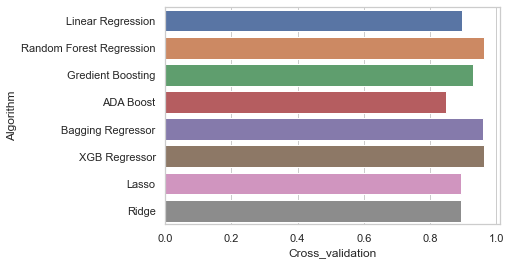

In [235]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### Based on R2 Score MSE and Cross validation scores Gredient Boosting is giving the best performance

### Hyperparametric Tuning

#### Random Search CV

#### Random Forest Regression

In [236]:
from sklearn.model_selection import RandomizedSearchCV

In [237]:
# Parameters for RFR
parameters = {"n_estimators":[100,200,300,400,500],"criterion":["mse","mae"]
              
              ,"max_depth":[3,4,5,6,7],"min_samples_split":[2,5,8,10,12],
              
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7]}

In [238]:
parameters

{'n_estimators': [100, 200, 300, 400, 500],
 'criterion': ['mse', 'mae'],
 'max_depth': [3, 4, 5, 6, 7],
 'min_samples_split': [2, 5, 8, 10, 12],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5, 6, 7]}

In [239]:
RFR = RandomForestRegressor()

In [240]:
random_search_RFR = RandomizedSearchCV(estimator=RFR,param_distributions=parameters,cv=5,n_jobs=-1,verbose=2)                       

In [241]:
# fitting the model
random_search_RFR.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

#### Best Estinators

In [242]:
random_search_RFR.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=7, min_samples_split=5,
                      n_estimators=500)

#### Best Parameters

In [243]:
random_search_RFR.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 7,
 'criterion': 'mae'}

#### Best Score

In [244]:
random_search_RFR.best_score_

0.9191178754424035

In [245]:
predictions_RFR = random_search_RFR.predict(X_test)

In [246]:
adjusted_r2 = 1 - (1-r2_score(y_test,predictions_RFR))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [247]:
from sklearn.metrics import explained_variance_score,mean_absolute_error

### Variance

In [248]:
variance = explained_variance_score(y_test,predictions_RFR)

### Mean Absolute Error

In [249]:
MAE_RFR = mean_absolute_error(y_test,predictions_RFR)

### Mean Square Error

In [250]:
MSE_RFR = mean_squared_error(y_test,predictions_RFR)

### Root Mean Square Error

In [251]:
RMSE_RFR = np.sqrt(MSE_RFR)

### Regression metrics for RFR

In [252]:
card = {
    "Train Score":[random_search_RFR.score(X_train,y_train)],
    "R2 Score":[r2_score(y_test,predictions_RFR)],
    "Adjusted_r2":[adjusted_r2],
    "Explained_variance":[variance],
    "MAE":[MAE_RFR],
    "MSE":[MSE_RFR],
    "RMSE":[RMSE_RFR]
}

metrics = pd.DataFrame(card)

In [253]:
metrics

,Train Score,R2 Score,Adjusted_r2,Explained_variance,MAE,MSE,RMSE
0,0.953437,0.917236,0.913015,0.917433,66608.880323,1.573885e+10,125454.555583


### Gredient Boosting (HT)

In [254]:
parameters_GB = {"n_estimators":[50,100,200,300,400],
              "learning_rate":[0.01,0.05,0.1,0.3,0.5],
              "max_depth":[3,4,5,6,7],
              "min_samples_split":[2,5,8,10,12],
             "max_features":['auto','sqrt'],
              "min_samples_leaf":[1,3,5,6,7]}

In [255]:
parameters_GB

{'n_estimators': [50, 100, 200, 300, 400],
 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
 'max_depth': [3, 4, 5, 6, 7],
 'min_samples_split': [2, 5, 8, 10, 12],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5, 6, 7]}

In [256]:
GB = GradientBoostingRegressor()

In [257]:
random_search_GB = RandomizedSearchCV(estimator=GB,param_distributions=parameters_GB,cv=5,n_jobs=-1,verbose=2)                       

In [258]:
random_search_GB.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.2s finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7],
                                        'min_samples_split': [2, 5, 8, 10, 12],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   verbose=2)

#### Best Estinators

In [259]:
random_search_GB.best_estimator_

GradientBoostingRegressor(learning_rate=0.3, max_depth=4, max_features='auto',
                          min_samples_leaf=7, min_samples_split=12,
                          n_estimators=300)

#### Best Parameters

In [260]:
random_search_GB.best_params_

{'n_estimators': 300,
 'min_samples_split': 12,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 4,
 'learning_rate': 0.3}

#### Best Score

In [261]:
random_search_GB.best_score_

0.9477463517436728

In [262]:
predictions_GB = random_search_GB.predict(X_test)

In [263]:
adjusted_r2 = 1 - (1-r2_score(y_test,predictions_GB))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [264]:
variance = explained_variance_score(y_test,predictions_GB)

In [265]:
MAE_GB = mean_absolute_error(y_test,predictions_GB)

In [266]:
MSE_GB = mean_squared_error(y_test,predictions_GB)

In [267]:
RMSE_GB = np.sqrt(MSE_GB)

### Regression metrics for GB

In [268]:
card_GB = {
    "Train Score":[random_search_GB.score(X_train,y_train)],
    "R2 Score":[r2_score(y_test,predictions_GB)],
    "Adjusted_r2":[adjusted_r2],
    "Explained_variance":[variance],
    "MAE":[MAE_GB],
    "MSE":[MSE_GB],
    "RMSE":[RMSE_GB]
}

metrics_GB = pd.DataFrame(card_GB)

In [269]:
metrics_GB

,Train Score,R2 Score,Adjusted_r2,Explained_variance,MAE,MSE,RMSE
0,0.992974,0.96923,0.967661,0.969236,46459.251757,5.851400e+09,76494.444466


### ADA Boosting Algorithm

In [270]:
n_estimators=[50,100,150,200]

learning_rate=[0.01,0.05,0.1,0.3,1]

loss=['linear', 'square', 'exponential']

In [271]:
parameters_ADA = {
    "n_estimators":n_estimators,
    "learning_rate":learning_rate,
    "loss":loss
}

In [272]:
parameters_ADA

{'n_estimators': [50, 100, 150, 200],
 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
 'loss': ['linear', 'square', 'exponential']}

In [273]:
ADA = AdaBoostRegressor()

In [274]:
random_search_ADA = RandomizedSearchCV(estimator=ADA,param_distributions=parameters_ADA,cv=5,n_jobs=-1,verbose=2)

In [275]:
random_search_ADA.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.5s finished


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=2)

#### Best Estimator

In [276]:
random_search_ADA.best_estimator_

AdaBoostRegressor(learning_rate=0.1, n_estimators=100)

#### Best Parameters

In [277]:
random_search_ADA.best_params_

{'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.1}

#### Best Score

In [278]:
random_search_ADA.best_score_

0.8620113490032095

In [279]:
predictions_ADA = random_search_ADA.predict(X_test)

In [280]:
adjusted_r2_ADA = 1 - (1-r2_score(y_test,predictions_ADA))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [281]:
variance_ADA = explained_variance_score(y_test,predictions_ADA)

In [282]:
MAE_ADA = mean_absolute_error(y_test,predictions_ADA)

In [283]:
MSE_ADA = mean_squared_error(y_test,predictions_ADA)

In [284]:
RMSE_ADA = np.sqrt(MSE_ADA)

### Regression metrics

In [285]:
card_ADA = {
    "Train Score":[random_search_ADA.score(X_train,y_train)],
    "R2 Score":[r2_score(y_test,predictions_ADA)],
    "Adjusted_r2":[adjusted_r2_ADA],
    "Explained_variance":[variance_ADA],
    "MAE":[MAE_ADA],
    "MSE":[MSE_ADA],
    "RMSE":[RMSE_ADA]
}

metrics_ADA = pd.DataFrame(card)

In [286]:
metrics_ADA

,Train Score,R2 Score,Adjusted_r2,Explained_variance,MAE,MSE,RMSE
0,0.953437,0.917236,0.913015,0.917433,66608.880323,1.573885e+10,125454.555583


### Lasso (HT)

In [287]:
parameters_LAS = {"alpha":[1,2,5,10,15,20,30,50,100,150,200,300,400,500,600,700,800,900,1000],
             "selection":["cyclic","random"]}

In [288]:
parameters_LAS

{'alpha': [1,
  2,
  5,
  10,
  15,
  20,
  30,
  50,
  100,
  150,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000],
 'selection': ['cyclic', 'random']}

In [289]:
LAS = Lasso()

In [290]:
random_search_LAS = RandomizedSearchCV(estimator=LAS,param_distributions=parameters_LAS,cv=5,n_jobs=-1,verbose=2)

In [291]:
random_search_LAS.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20, 30, 50,
                                                  100, 150, 200, 300, 400, 500,
                                                  600, 700, 800, 900, 1000],
                                        'selection': ['cyclic', 'random']},
                   verbose=2)

#### Best Estimators

In [292]:
random_search_LAS.best_estimator_

Lasso(alpha=1000)

#### Best Parameters

In [293]:
random_search_LAS.best_params_

{'selection': 'cyclic', 'alpha': 1000}

#### Best Scores

In [294]:
random_search_LAS.best_score_

0.8936746158316158

In [295]:
predictions_LAS = random_search_LAS.predict(X_test)

In [296]:
adjusted_r2_LAS = 1 - (1-r2_score(y_test,predictions_LAS))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [297]:
variance_LAS = explained_variance_score(y_test,predictions_LAS)

In [298]:
MAE_LAS = mean_absolute_error(y_test,predictions_LAS)

In [299]:
MSE_LAS = mean_squared_error(y_test,predictions_LAS)

In [300]:
RMSE_LAS = np.sqrt(MSE_LAS)

### Regression metrics

In [301]:
card_LAS = {
    "Train Score":[random_search_LAS.score(X_train,y_train)],
    "R2 Score":[r2_score(y_test,predictions_LAS)],
    "Adjusted_r2":[adjusted_r2_LAS],
    "Explained_variance":[variance_LAS],
    "MAE":[MAE_LAS],
    "MSE":[MSE_LAS],
    "RMSE":[RMSE_LAS]
}

metrics_LAS = pd.DataFrame(card)

In [302]:
metrics_LAS

,Train Score,R2 Score,Adjusted_r2,Explained_variance,MAE,MSE,RMSE
0,0.953437,0.917236,0.913015,0.917433,66608.880323,1.573885e+10,125454.555583


### Ridge

In [303]:
parameters_RID = {"alpha":[1,2,5,10,15,20,30,50,100,150,200,300,400,500,600,700,800,900,1000,10000,50000,100000],
                 "solver":["auto","svd","cholesky","lsqr","sparse_cg","sag","saga"]}

In [304]:
parameters_RID

{'alpha': [1,
  2,
  5,
  10,
  15,
  20,
  30,
  50,
  100,
  150,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  10000,
  50000,
  100000],
 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [305]:
RID = Ridge()

In [306]:
random_search_RID=RandomizedSearchCV(estimator=RID,param_distributions=parameters_RID,cv=5,n_jobs=-1,verbose=2)

In [307]:
random_search_RID.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [1, 2, 5, 10, 15, 20, 30, 50,
                                                  100, 150, 200, 300, 400, 500,
                                                  600, 700, 800, 900, 1000,
                                                  10000, 50000, 100000],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   verbose=2)

#### Best Estimators

In [308]:
random_search_RID.best_estimator_

Ridge(alpha=50, solver='cholesky')

#### Best Parameters

In [309]:
random_search_RID.best_params_

{'solver': 'cholesky', 'alpha': 50}

#### Best Score

In [310]:
random_search_RID.best_score_

0.8936058016966925

In [311]:
predictions_RID = random_search_RID.predict(X_test)

In [312]:
adjusted_r2_RID = 1 - (1-r2_score(y_test,predictions_RID))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [313]:
variance_RID = explained_variance_score(y_test,predictions_RID)

In [314]:
MAE_RID = mean_absolute_error(y_test,predictions_RID)

In [315]:
MSE_RID = mean_squared_error(y_test,predictions_RID)

In [316]:
RMSE_RID = np.sqrt(MSE_RID)

### Regression metrics

In [317]:
card_RID = {
    "Train Score":[random_search_RID.score(X_train,y_train)],
    "R2 Score":[r2_score(y_test,predictions_RID)],
    "Adjusted_r2":[adjusted_r2_RID],
    "Explained_variance":[variance_RID],
    "MAE":[MAE_RID],
    "MSE":[MSE_RID],
    "RMSE":[RMSE_RID]
}

metrics_RID = pd.DataFrame(card)

In [318]:
metrics_RID

,Train Score,R2 Score,Adjusted_r2,Explained_variance,MAE,MSE,RMSE
0,0.953437,0.917236,0.913015,0.917433,66608.880323,1.573885e+10,125454.555583


### Based on all the Hyperparametric Tuning of ML models Gredient Boosting Regressor Has the best performance.

### Conclusion

In [319]:
x.head()

,Car_Name,Variant,Kilometers,Purchase_Date,Owners,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,Brand_KIA,Brand_Landrover,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Mitsubishi,Brand_Nissan,Brand_Renault,Brand_Skoda,Brand_Ssangyong,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Location_Bangaluru,Location_Chennai,Location_Delhi,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Pune,Transmission_MANUAL
0,1.248814,1.144302,0.300461,0.299994,-0.525962,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,-0.233161,-0.531026,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,6.360109,-1.000473,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,-1.538259,-0.137988,-0.061633,-0.322361,-0.356604,-0.357866,2.749310,-0.316968,-0.206551,-0.368712,-0.367884,-0.362058,0.402315
1,-0.814517,-0.851780,-0.118743,-0.953652,-0.525962,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,-0.233161,-0.531026,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,-0.157230,0.999527,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,0.650085,-0.137988,-0.061633,-0.322361,-0.356604,-0.357866,-0.363728,-0.316968,4.841416,-0.368712,-0.367884,-0.362058,0.402315
2,-0.768711,-0.669455,-0.124552,-1.580475,-0.525962,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,-0.233161,1.883145,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,-0.157230,-1.000473,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,0.650085,-0.137988,-0.061633,3.102115,-0.356604,-0.357866,-0.363728,-0.316968,-0.206551,-0.368712,-0.367884,-0.362058,0.402315
3,0.459501,-0.202088,-1.003213,0.926817,-0.525962,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,4.288880,-0.531026,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,-0.157230,-1.000473,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,0.650085,-0.137988,-0.061633,-0.322361,-0.356604,-0.357866,-0.363728,-0.316968,-0.206551,2.712145,-0.367884,-0.362058,0.402315
4,-0.791542,-0.398647,-1.128222,-0.013417,3.371968,-0.095232,-0.090038,-0.077124,-0.04354,-0.139758,-0.233161,1.883145,-0.015381,-0.080169,-0.090038,-0.040723,-0.095232,-0.157230,-1.000473,-0.117936,-0.034409,-0.065388,-0.134385,-0.065388,-0.026647,-0.138875,-0.21811,-0.136197,0.650085,-0.137988,-0.061633,-0.322361,2.804235,-0.357866,-0.363728,-0.316968,-0.206551,-0.368712,-0.367884,-0.362058,0.402315


Text(0, 0.5, 'Predicted Y')

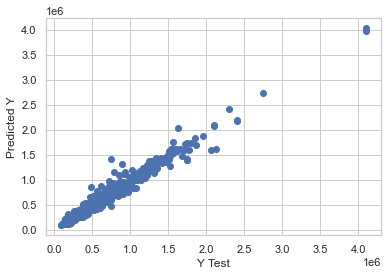

In [320]:
#scatterplot of the real test values versus the predicted values

plt.scatter(y_test,predictions_GB)

plt.xlabel('Y Test')

plt.ylabel('Predicted Y')

#### We can observe that when we plot the predicted values with the actual values we get a graph that looks some what linear in nature

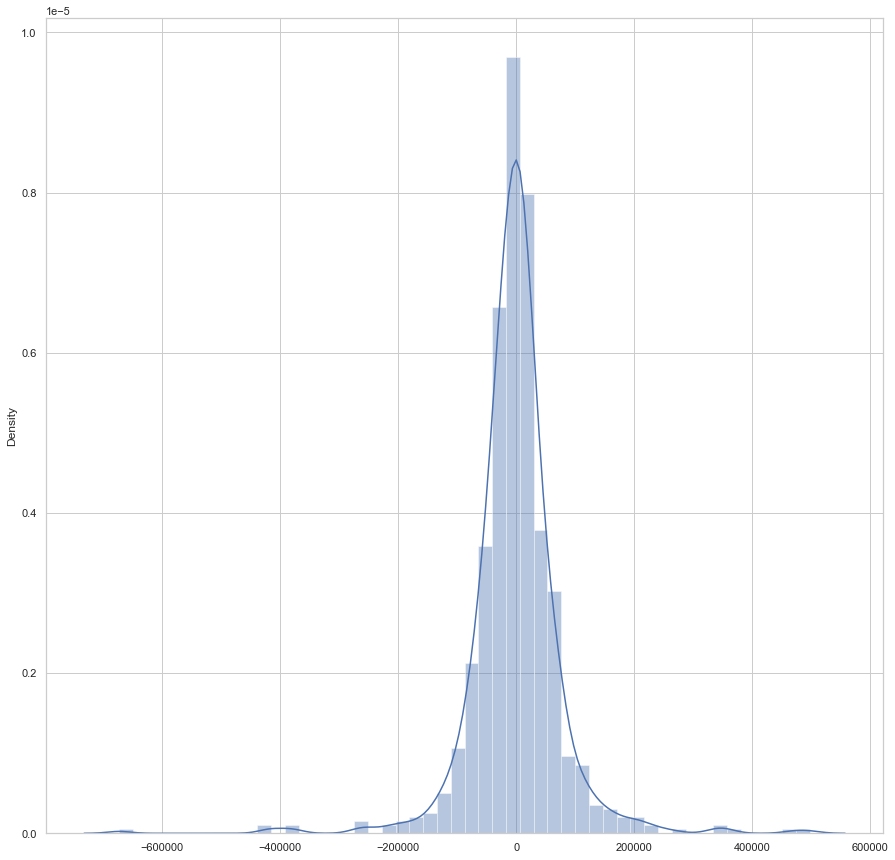

In [321]:
plt.figure(figsize=(15,15))
sns.distplot((y_test-predictions_GB));

### Ploting a histogram of the residuals to make sure it looks normally distributed

## Comparing Predicted values with Actual values

In [322]:
# Comparing predicted value vs actual value

print(np.concatenate((predictions_GB.reshape(len(predictions_GB),1), y_test.reshape(len(y_test),1)),1))

[[407733.14116135 443099.        ]
 [385367.40667953 263399.        ]
 [974182.11740486 718599.        ]
 ...
 [364715.0229533  377299.        ]
 [333659.60445476 368599.        ]
 [455327.90589482 440799.        ]]


### Saving the model

In [323]:
import pickle

In [324]:
# open a file, where you ant to store the data
file = open('car_price_prediction_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search_GB, file)